<ul style="list-style-type:none; text-align: center;">
    <li style="font-family:'Times New Roman';font-weight: bold;font-size:40px;color:#2b31ab">Capstone Project- Health Care </li>
</ul>

### Business Problem:
We all know that Health care is very important domain in the market. It is directly linked with the life of the individual; hence we have to be always be proactive in this particular domain. Money plays a major role in this domain, because sometime treatment becomes super costly and if any individual is not covered under the insurance then it will become a pretty tough financial situation for that individual. The companies in the medical insurance also want to reduce their risk by optimizing the insurance cost, because we all know a healthy body is in the hand of the individual only. If individual eat healthy and do proper exercise the chance of getting ill is drastically reduced.

### Goal & Objective: 
The objective of this exercise is to build a model, using data that provide the optimum insurance cost for an individual. You have to use the health and habit related parameters for the estimated cost of insurance


#### Data Dictionary


* applicant_id : Applicant unique ID
* years_of_insurance_with_us : Since how many years customer is taking policy from the same company only
* regular_checkup_lasy_year : Number of times customers has done the regular health check up in last one year
* adventure_sports: Customer is involved with adventure sports like climbing, diving etc.
* Occupation : Occupation of the customer
* visited_doctor_last_1_year: Number of times customer has visited doctor in last one year
* cholesterol_level : Cholesterol level of the customers while applying for insurance
* daily_avg_steps : Average daily steps walked by customers
* age : Age of the customer
* heart_decs_history: Any past heart diseases
* other_major_decs_history : Any past major diseases apart from heart like any operation
* Gender: Gender of the customer
* avg_glucose_level: Average glucose level of the customer while applying the insurance
* bmi: BMI of the customer while applying the insurance
* smoking_status: Smoking status of the customer
* Year_last_admitted: When customer have been admitted in the hospital last time
* Location: Location of the hospital
* weight: Weight of the customer
* covered_by_any_other_company: Customer is covered from any other insurance company
* Alcohol: Alcohol consumption status of the customer
* exercise: Regular exercise status of the customer
* weight_change_in_last_one_year: How much variation has been seen in the weight of the customer in last year
* fat_percentage: Fat percentage of the customer while applying the insurance
* insurance_cost: Total Insurance cost

### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")


In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.20.1
Pandas Version 1.2.4
Seaborn Version 0.11.1
Matplotlib Version 3.3.4


### Loading the data set

In [3]:
df=pd.read_csv('Data.csv')

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,25000.0,17499.500000,7217.022701,5000.0,11249.75,17499.5,23749.25,29999.0
years_of_insurance_with_us,25000.0,4.089040,2.606612,0.0,2.00,4.0,6.00,8.0
regular_checkup_lasy_year,25000.0,0.773680,1.199449,0.0,0.00,0.0,1.00,5.0
adventure_sports,25000.0,0.081720,0.273943,0.0,0.00,0.0,0.00,1.0
visited_doctor_last_1_year,25000.0,3.104200,1.141663,0.0,2.00,3.0,4.00,12.0
daily_avg_steps,25000.0,5215.889320,1053.179748,2034.0,4543.00,5089.0,5730.00,11255.0
age,25000.0,44.918320,16.107492,16.0,31.00,45.0,59.00,74.0
heart_decs_history,25000.0,0.054640,0.227281,0.0,0.00,0.0,0.00,1.0
other_major_decs_history,25000.0,0.098160,0.297537,0.0,0.00,0.0,0.00,1.0
avg_glucose_level,25000.0,167.530000,62.729712,57.0,113.00,168.0,222.00,277.0


In [5]:
df.tail()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
24995,29995,3,0,0,Salried,4,225 to 250,5614,22,0,...,smokes,2000.0,Kanpur,79,Y,Rare,Moderate,4,40,39488
24996,29996,6,0,0,Business,4,200 to 225,4719,58,0,...,never smoked,2009.0,Kanpur,66,N,Rare,Moderate,2,28,14808
24997,29997,7,0,1,Student,2,150 to 175,5624,34,0,...,Unknown,NaN,Bhubaneswar,76,N,Rare,Moderate,1,35,33318
24998,29998,1,0,0,Salried,2,225 to 250,10777,27,0,...,Unknown,NaN,Surat,74,N,Rare,Moderate,0,40,30850
24999,29999,8,2,0,Business,4,150 to 175,5882,22,1,...,formerly smoked,2014.0,Chennai,57,N,No,No,4,21,6170


In [6]:
pd.options.display.max_columns = None

In [7]:
df.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,Year_last_admitted,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,0,Male,97,31.2,Unknown,NaN,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,0,Male,212,34.2,formerly smoked,NaN,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,0,Female,166,40.4,formerly smoked,NaN,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,0,Female,109,22.9,Unknown,NaN,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,1,Male,118,26.5,never smoked,2004.0,Bangalore,74,N,No,Extreme,0,34,29616


In [8]:
## Checking the shape of the data: Number of columns and rows

df.shape

(25000, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [10]:
## Statistical summary of Numeric variable
df.describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,25000.0,17499.500000,7217.022701,5000.0,11249.75,17499.5,23749.25,29999.0
years_of_insurance_with_us,25000.0,4.089040,2.606612,0.0,2.00,4.0,6.00,8.0
regular_checkup_lasy_year,25000.0,0.773680,1.199449,0.0,0.00,0.0,1.00,5.0
adventure_sports,25000.0,0.081720,0.273943,0.0,0.00,0.0,0.00,1.0
visited_doctor_last_1_year,25000.0,3.104200,1.141663,0.0,2.00,3.0,4.00,12.0
daily_avg_steps,25000.0,5215.889320,1053.179748,2034.0,4543.00,5089.0,5730.00,11255.0
age,25000.0,44.918320,16.107492,16.0,31.00,45.0,59.00,74.0
heart_decs_history,25000.0,0.054640,0.227281,0.0,0.00,0.0,0.00,1.0
other_major_decs_history,25000.0,0.098160,0.297537,0.0,0.00,0.0,0.00,1.0
avg_glucose_level,25000.0,167.530000,62.729712,57.0,113.00,168.0,222.00,277.0


In [11]:
## Statistical summary of object datatype variable
df.describe(include= 'object').T

,count,unique,top,freq
Occupation,25000,3,Student,10169
cholesterol_level,25000,5,150 to 175,8763
Gender,25000,2,Male,16422
smoking_status,25000,4,never smoked,9249
Location,25000,15,Bangalore,1742
covered_by_any_other_company,25000,2,N,17418
Alcohol,25000,3,Rare,13752
exercise,25000,3,Moderate,14638


In [12]:
### Examine missing values
df_na = df.isna().sum()
df_na[df_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

Year_last_admitted    11881
bmi                     990
dtype: int64

In [13]:
percent_missing = df.isnull().sum() * 100 / df.shape[0]

In [14]:
percent_missing[percent_missing >0]

bmi                    3.960
Year_last_admitted    47.524
dtype: float64

* Here only two features have missing values that is year_last_addmitted and bmi.
* for our bussiness point of view these two feature is very important.
* bmi feature have almost 4 % missing values whereas year_last_addmitted almost have 48 % missing values.
* If we observerd values from year_last_addmitted feture it has nan values for year so we can assume that this person never admitted before. We can do feature engineering here and create new addmitted_status yes or No. There might be chance of person with higher age and admitted status no.
* for bmi feature we can impute the missing values

In [15]:
df.Year_last_admitted.describe()

count    13119.000000
mean      2003.892217
std          7.581521
min       1990.000000
25%       1997.000000
50%       2004.000000
75%       2010.000000
max       2018.000000
Name: Year_last_admitted, dtype: float64

In [16]:
df.Year_last_admitted.fillna('No', inplace=True)

In [17]:
df.Year_last_admitted.unique()

array(['No', 2004.0, 2003.0, 2007.0, 1994.0, 2010.0, 2017.0, 2002.0,
       1996.0, 2008.0, 1991.0, 1995.0, 2001.0, 2013.0, 2011.0, 2005.0,
       2018.0, 1998.0, 1997.0, 1999.0, 1992.0, 2012.0, 2009.0, 2014.0,
       2000.0, 1993.0, 2016.0, 2006.0, 2015.0, 1990.0], dtype=object)

In [18]:
## Imputing the records having year addmitted history with Yes as amitted status
df['Year_last_admitted'] = np.where((df['Year_last_admitted'] != 0) & (df['Year_last_admitted'] != 'No'), 'Yes', df['Year_last_admitted'])

In [19]:
df.Year_last_admitted.value_counts()

Yes    13119
No     11881
Name: Year_last_admitted, dtype: int64

In [20]:
df.rename(columns={'Year_last_admitted': 'admitted_status'}, inplace=True)

In [21]:
df.admitted_status = df.admitted_status.astype('object')

In [22]:
df.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,admitted_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,0,Male,97,31.2,Unknown,No,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,0,Male,212,34.2,formerly smoked,No,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,0,Female,166,40.4,formerly smoked,No,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,0,Female,109,22.9,Unknown,No,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,1,Male,118,26.5,never smoked,Yes,Bangalore,74,N,No,Extreme,0,34,29616


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  int64  
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  int64  
 10  other_major_decs_history        25000 non-null  int64  
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [24]:
## Lets Explore for bmi feature
df.bmi.describe()

count    24010.000000
mean        31.393328
std          7.876535
min         12.300000
25%         26.100000
50%         30.500000
75%         35.600000
max        100.600000
Name: bmi, dtype: float64

<AxesSubplot:>

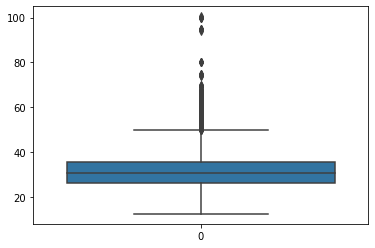

In [25]:
sns.boxplot(data=df.bmi)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

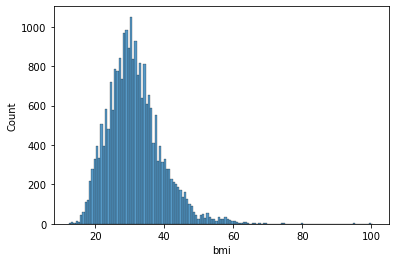

In [26]:
sns.histplot(data=df.bmi)

In [27]:
df.isna().sum()

applicant_id                        0
years_of_insurance_with_us          0
regular_checkup_lasy_year           0
adventure_sports                    0
Occupation                          0
visited_doctor_last_1_year          0
cholesterol_level                   0
daily_avg_steps                     0
age                                 0
heart_decs_history                  0
other_major_decs_history            0
Gender                              0
avg_glucose_level                   0
bmi                               990
smoking_status                      0
admitted_status                     0
Location                            0
weight                              0
covered_by_any_other_company        0
Alcohol                             0
exercise                            0
weight_change_in_last_one_year      0
fat_percentage                      0
insurance_cost                      0
dtype: int64

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,25000.0,17499.500000,7217.022701,5000.0,11249.75,17499.5,23749.25,29999.0
years_of_insurance_with_us,25000.0,4.089040,2.606612,0.0,2.00,4.0,6.00,8.0
regular_checkup_lasy_year,25000.0,0.773680,1.199449,0.0,0.00,0.0,1.00,5.0
adventure_sports,25000.0,0.081720,0.273943,0.0,0.00,0.0,0.00,1.0
visited_doctor_last_1_year,25000.0,3.104200,1.141663,0.0,2.00,3.0,4.00,12.0
daily_avg_steps,25000.0,5215.889320,1053.179748,2034.0,4543.00,5089.0,5730.00,11255.0
age,25000.0,44.918320,16.107492,16.0,31.00,45.0,59.00,74.0
heart_decs_history,25000.0,0.054640,0.227281,0.0,0.00,0.0,0.00,1.0
other_major_decs_history,25000.0,0.098160,0.297537,0.0,0.00,0.0,0.00,1.0
avg_glucose_level,25000.0,167.530000,62.729712,57.0,113.00,168.0,222.00,277.0


In [29]:
# filling the missing value of bmi with 0 
df['bmi'].fillna(0, inplace=True)

In [30]:
df.bmi.describe()

count    25000.000000
mean        30.150152
std          9.852226
min          0.000000
25%         25.400000
50%         30.200000
75%         35.300000
max        100.600000
Name: bmi, dtype: float64

In [31]:
df[(df.bmi!=0) & (df.Gender=='Male')].describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,15689.0,17515.243929,7229.922015,5000.0,11243.0,17523.0,23781.0,29999.0
years_of_insurance_with_us,15689.0,4.068456,2.617271,0.0,2.0,4.0,6.0,8.0
regular_checkup_lasy_year,15689.0,0.764230,1.197665,0.0,0.0,0.0,1.0,5.0
adventure_sports,15689.0,0.081076,0.272960,0.0,0.0,0.0,0.0,1.0
visited_doctor_last_1_year,15689.0,3.107018,1.143606,0.0,2.0,3.0,4.0,12.0
daily_avg_steps,15689.0,5208.430811,1052.871377,2182.0,4532.0,5089.0,5723.0,11063.0
age,15689.0,44.902479,16.101228,16.0,31.0,45.0,59.0,74.0
heart_decs_history,15689.0,0.068009,0.251770,0.0,0.0,0.0,0.0,1.0
other_major_decs_history,15689.0,0.126968,0.332948,0.0,0.0,0.0,0.0,1.0
avg_glucose_level,15689.0,167.438588,62.733554,57.0,113.0,168.0,222.0,277.0


In [32]:
# Median of BMI for Male 
df[(df.bmi!=0) & (df.Gender=='Male')].bmi.median()

32.1

In [33]:
df[(df.bmi!=0) & (df.Gender=='Female')].describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,8321.0,17465.975484,7198.646710,5002.0,11259.0,17446.0,23697.0,29994.0
years_of_insurance_with_us,8321.0,4.116693,2.589775,0.0,2.0,4.0,6.0,8.0
regular_checkup_lasy_year,8321.0,0.791612,1.205688,0.0,0.0,0.0,1.0,5.0
adventure_sports,8321.0,0.083524,0.276689,0.0,0.0,0.0,0.0,1.0
visited_doctor_last_1_year,8321.0,3.102392,1.142006,1.0,2.0,3.0,4.0,10.0
daily_avg_steps,8321.0,5229.876938,1054.767077,2034.0,4565.0,5088.0,5749.0,11255.0
age,8321.0,44.949766,16.063385,16.0,31.0,45.0,59.0,74.0
heart_decs_history,8321.0,0.016705,0.128170,0.0,0.0,0.0,0.0,1.0
other_major_decs_history,8321.0,0.027641,0.163952,0.0,0.0,0.0,0.0,1.0
avg_glucose_level,8321.0,167.715659,62.721886,57.0,115.0,167.0,222.0,277.0


In [34]:
# Median of BMI for Female 
df[(df.bmi!=0) & (df.Gender=='Female')].bmi.median()

26.2

In [35]:
df.Gender[df.bmi==0].value_counts()

Male      733
Female    257
Name: Gender, dtype: int64

* there are 733 Male and 257 female record for which bmi value is missing
* there are differance in the median value of bmi across gender.
* We can impute the missing values BMI for Male and Female with the median value of male and female bmi repectively.

In [36]:
df['bmi'] = np.where((df['bmi'] == 0) & (df['Gender'] == 'Male'), df[(df.bmi!=0) & (df.Gender=='Male')].bmi.median(), df['bmi'])

In [37]:
df['bmi'] = np.where((df['bmi'] == 0) & (df['Gender'] == 'Female'), df[(df.bmi!=0) & (df.Gender=='Female')].bmi.median(), df['bmi'])

In [38]:
df[df.Gender=='Female'].bmi.median()

26.2

In [39]:
df[(df.bmi!=0) & (df.Gender=='Male')].bmi.median()

32.1

In [40]:
df.isna().sum()

applicant_id                      0
years_of_insurance_with_us        0
regular_checkup_lasy_year         0
adventure_sports                  0
Occupation                        0
visited_doctor_last_1_year        0
cholesterol_level                 0
daily_avg_steps                   0
age                               0
heart_decs_history                0
other_major_decs_history          0
Gender                            0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
admitted_status                   0
Location                          0
weight                            0
covered_by_any_other_company      0
Alcohol                           0
exercise                          0
weight_change_in_last_one_year    0
fat_percentage                    0
insurance_cost                    0
dtype: int64

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,25000.0,17499.50000,7217.022701,5000.0,11249.75,17499.5,23749.25,29999.0
years_of_insurance_with_us,25000.0,4.08904,2.606612,0.0,2.00,4.0,6.00,8.0
regular_checkup_lasy_year,25000.0,0.77368,1.199449,0.0,0.00,0.0,1.00,5.0
adventure_sports,25000.0,0.08172,0.273943,0.0,0.00,0.0,0.00,1.0
visited_doctor_last_1_year,25000.0,3.10420,1.141663,0.0,2.00,3.0,4.00,12.0
daily_avg_steps,25000.0,5215.88932,1053.179748,2034.0,4543.00,5089.0,5730.00,11255.0
age,25000.0,44.91832,16.107492,16.0,31.00,45.0,59.00,74.0
heart_decs_history,25000.0,0.05464,0.227281,0.0,0.00,0.0,0.00,1.0
other_major_decs_history,25000.0,0.09816,0.297537,0.0,0.00,0.0,0.00,1.0
avg_glucose_level,25000.0,167.53000,62.729712,57.0,113.00,168.0,222.00,277.0


In [42]:
df.years_of_insurance_with_us.unique()

array([3, 0, 1, 7, 8, 4, 6, 5, 2], dtype=int64)

In [43]:
df.regular_checkup_lasy_year.unique()

array([1, 0, 4, 3, 2, 5], dtype=int64)

In [44]:
df.weight_change_in_last_one_year.unique()

array([1, 3, 0, 2, 4, 5, 6], dtype=int64)

In [45]:
df.other_major_decs_history.unique()

array([0, 1], dtype=int64)

In [46]:
df.adventure_sports.unique()

array([1, 0], dtype=int64)

In [47]:
df.heart_decs_history.unique()

array([1, 0], dtype=int64)

In [48]:
df.weight_change_in_last_one_year.unique()

array([1, 3, 0, 2, 4, 5, 6], dtype=int64)

From above summary we can see adventure_sports,heart_decs_historyand other_major_decs_history these 3 feature are of boolean datatype(0 or 1). so we can convert it into object data type

In [49]:
df[['other_major_decs_history', 'adventure_sports','heart_decs_history']] = df[['other_major_decs_history', 'adventure_sports','heart_decs_history']].astype(object)

In [50]:
# to check the catagorical feature and its unique sub catagory
for i in df.columns: 
    if df[i].dtype == 'object': 
        print('\n')
        print('feature:',i)
        print(pd.Categorical(df[i].unique()))



feature: adventure_sports
[1, 0]
Categories (2, int64): [0, 1]


feature: Occupation
['Salried', 'Student', 'Business']
Categories (3, object): ['Business', 'Salried', 'Student']


feature: cholesterol_level
['125 to 150', '150 to 175', '200 to 225', '175 to 200', '225 to 250']
Categories (5, object): ['125 to 150', '150 to 175', '175 to 200', '200 to 225', '225 to 250']


feature: heart_decs_history
[1, 0]
Categories (2, int64): [0, 1]


feature: other_major_decs_history
[0, 1]
Categories (2, int64): [0, 1]


feature: Gender
['Male', 'Female']
Categories (2, object): ['Female', 'Male']


feature: smoking_status
['Unknown', 'formerly smoked', 'never smoked', 'smokes']
Categories (4, object): ['Unknown', 'formerly smoked', 'never smoked', 'smokes']


feature: admitted_status
['No', 'Yes']
Categories (2, object): ['No', 'Yes']


feature: Location
['Chennai', 'Jaipur', 'Bangalore', 'Bhubaneswar', 'Guwahati', ..., 'Mangalore', 'Kolkata', 'Delhi', 'Ahmedabad', 'Lucknow']
Length: 15
Catego

In [51]:
# find the list of catagorical and numerical features
categoriacl_features=[]
numerical_features=[]
for i in df.columns:
    if df[i].dtype=="object":
        categoriacl_features.append(i)
    else:
        numerical_features.append(i)
print('categoriacl_features: ',categoriacl_features) 
print('\n numerical_features: ',numerical_features)

categoriacl_features:  ['adventure_sports', 'Occupation', 'cholesterol_level', 'heart_decs_history', 'other_major_decs_history', 'Gender', 'smoking_status', 'admitted_status', 'Location', 'covered_by_any_other_company', 'Alcohol', 'exercise']

 numerical_features:  ['applicant_id', 'years_of_insurance_with_us', 'regular_checkup_lasy_year', 'visited_doctor_last_1_year', 'daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight', 'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost']


In [52]:
#Checking for ducplicate Value
dup = df.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


In [53]:
# Skewness and kurtosis check
table = pd.concat([df.skew(), df.kurtosis()], axis=1, join="inner")
table=table.rename(columns={0:'Skewness',1:'kurtosis'})
table

,Skewness,kurtosis
applicant_id,0.000000,-1.200000
years_of_insurance_with_us,-0.075217,-1.220697
regular_checkup_lasy_year,1.610907,1.838439
adventure_sports,3.054017,7.327604
visited_doctor_last_1_year,0.978456,1.786368
daily_avg_steps,0.908867,1.854386
age,0.013860,-1.176534
heart_decs_history,3.919343,13.362321
other_major_decs_history,2.701327,5.297593
avg_glucose_level,-0.006389,-1.199167


* Skewness and kurtosis value in between acceptable range for all numeric variable

In [54]:
### Let's examine the target column which is insurance cost

df.describe(include="all")["insurance_cost"]

count     25000.000000
unique             NaN
top                NaN
freq               NaN
mean      27147.407680
std       14323.691832
min        2468.000000
25%       16042.000000
50%       27148.000000
75%       37020.000000
max       67870.000000
Name: insurance_cost, dtype: float64

In [55]:
df.insurance_cost.unique()

array([20978,  6170, 28382, 27148, 29616, 39488, 37020, 22212,  8638,
       25914, 17276, 14808, 46892, 33318, 49360, 18510, 32084, 12340,
        3702,  9872, 55530,  4936, 51828, 23446,  7404, 57998, 38254,
       24680, 60466, 54296, 34552, 16042, 30850, 41956, 13574, 43190,
       48126, 19744, 56764, 35786, 11106, 61700, 44424, 40722, 59232,
       53062, 64168, 62934, 45658, 50594, 65402, 66636, 67870,  2468],
      dtype=int64)

Check the difference between 75% and Max value - looks like there are outliers/extreme values in the insurance_cost variable. However as we are not sure if these are real outliers, we will not treat them right now.

In [56]:
df["insurance_cost"].value_counts().sort_index()

2468       12
3702      309
4936      197
6170      970
7404     1214
8638      954
9872      742
11106     431
12340     373
13574     454
14808     569
16042     578
17276     644
18510     615
19744     637
20978     717
22212     658
23446     634
24680     669
25914     779
27148     719
28382     845
29616     766
30850     743
32084     677
33318     733
34552     857
35786     827
37020     869
38254     977
39488     727
40722     474
41956     389
43190     265
44424     253
45658     233
46892     254
48126     259
49360     239
50594     199
51828     177
53062     192
54296     172
55530     152
56764     122
57998     113
59232     140
60466     137
61700      70
62934      87
64168      77
65402      56
66636      27
67870      17
Name: insurance_cost, dtype: int64

In [57]:
#Let's look at the distribution of insurance_cost at different percentiles
print("0.5% insurer have a insurance_cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 0.5)))
print("  1% insurer have a insurance_cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 1)))
print("  5% insurer have a insurance_cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 5)))
print(" 10% insurer have a insurance_cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 10)))
print(" 90% insurer have a insurance_cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 90)))
print(" 95% insurer have a insurance_cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 95)))
print(" 99% insurer have a insurance_cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 99)))
print("99.5% insurer have a insurance_cost lower than {0: .2f}".format(np.percentile(df["insurance_cost"], 99.5)))

0.5% insurer have a insurance_cost lower than  3702.00
  1% insurer have a insurance_cost lower than  3702.00
  5% insurer have a insurance_cost lower than  6170.00
 10% insurer have a insurance_cost lower than  7404.00
 90% insurer have a insurance_cost lower than  45658.00
 95% insurer have a insurance_cost lower than  53062.00
 99% insurer have a insurance_cost lower than  62934.00
99.5% insurer have a insurance_cost lower than  64168.00


In [58]:
## We are interested in building a model to correctly predict the insurance_cost which are greater than 0 and less than 62934

In [59]:
df1 = df[(df.insurance_cost > 1 ) & (df.insurance_cost < 62934 )] 

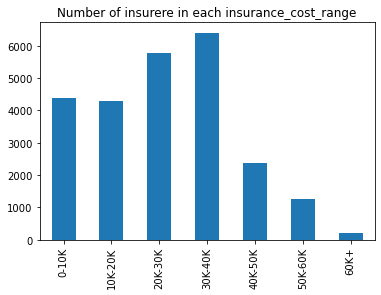

In [60]:
## Let's create a range variable to understand how many records we have in different slabs

insurance_cost_range = pd.cut(df1["insurance_cost"], 
                     bins=[0,10000, 20000,30000 , 40000, 50000, 60000, df1["insurance_cost"].max()], 
                     labels=["0-10K", "10K-20K","20K-30K","30K-40K","40K-50K","50K-60K", "60K+"])
df1["insurance_cost_range"] = insurance_cost_range
df1["insurance_cost_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of insurere in each insurance_cost_range")
plt.show()

* We can also consider 'insurance_cost' as a Multiclass classifier and predict the probability of a class , instead of using insurance_cost as a numeric variable. Sometimes the business is interested in predicting/estimating the insurance_cost range and not an exact insurance_cost. However as we are working on regression model, this variable would be dropped.

* One of insight we can take from here is that most insurers insurance cost lie between 20000 and 40000.

<AxesSubplot:xlabel='insurance_cost', ylabel='Density'>

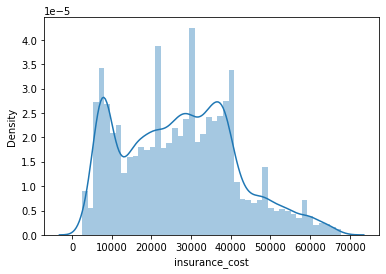

In [61]:
sns.distplot(df['insurance_cost'])

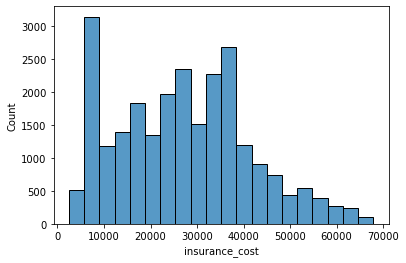

In [62]:
sns.histplot(df['insurance_cost'],bins=20);

In [63]:
# Lets explore Numeric variable effect on insurance_cost

### Univariate Analysis 

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  object 
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  object 
 10  other_major_decs_history        25000 non-null  object 
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

In [65]:
df_num=df.select_dtypes(include=(['float64','int64']))
df_num.columns

Index(['applicant_id', 'years_of_insurance_with_us',
       'regular_checkup_lasy_year', 'visited_doctor_last_1_year',
       'daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight',
       'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost'],
      dtype='object')

In [66]:
df_cat=df.select_dtypes(include=('object'))
df_cat.columns

Index(['adventure_sports', 'Occupation', 'cholesterol_level',
       'heart_decs_history', 'other_major_decs_history', 'Gender',
       'smoking_status', 'admitted_status', 'Location',
       'covered_by_any_other_company', 'Alcohol', 'exercise'],
      dtype='object')

### Univariate Analysis categorical features

In [67]:
# to check the catagorical feature and its unique sub catagory
for x in df_cat.columns:
    print(x.upper(), " : ", df_cat[x].nunique())
    print(df_cat[x].value_counts().sort_values(ascending=False) )
    print('='*40 ,"\n")

ADVENTURE_SPORTS  :  2
0    22957
1     2043
Name: adventure_sports, dtype: int64

OCCUPATION  :  3
Student     10169
Business    10020
Salried      4811
Name: Occupation, dtype: int64

CHOLESTEROL_LEVEL  :  5
150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054
Name: cholesterol_level, dtype: int64

HEART_DECS_HISTORY  :  2
0    23634
1     1366
Name: heart_decs_history, dtype: int64

OTHER_MAJOR_DECS_HISTORY  :  2
0    22546
1     2454
Name: other_major_decs_history, dtype: int64

GENDER  :  2
Male      16422
Female     8578
Name: Gender, dtype: int64

SMOKING_STATUS  :  4
never smoked       9249
Unknown            7555
formerly smoked    4329
smokes             3867
Name: smoking_status, dtype: int64

ADMITTED_STATUS  :  2
Yes    13119
No     11881
Name: admitted_status, dtype: int64

LOCATION  :  15
Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Ahmedabad      1677
Guwahati       1672
Che

### Univariate Analysis - BoxPlot

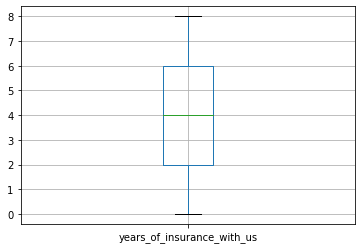

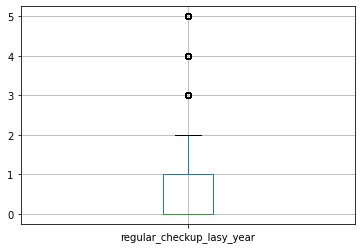

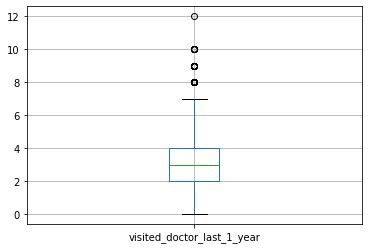

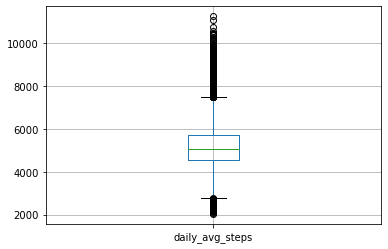

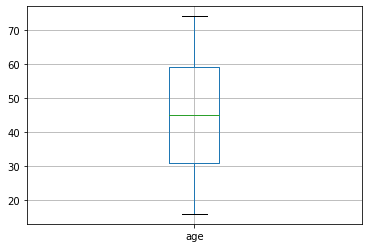

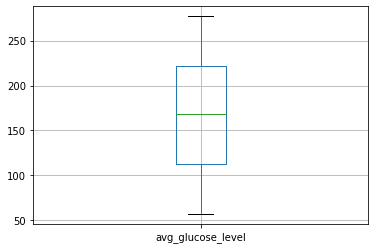

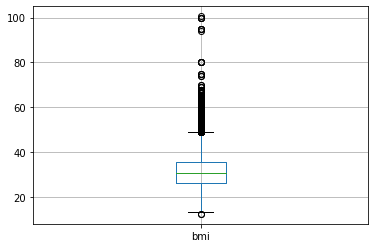

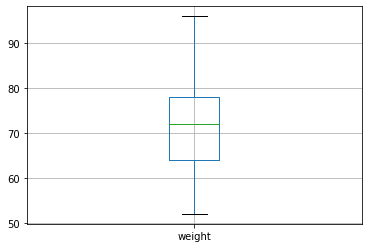

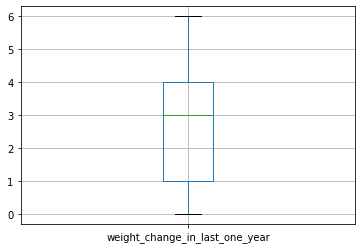

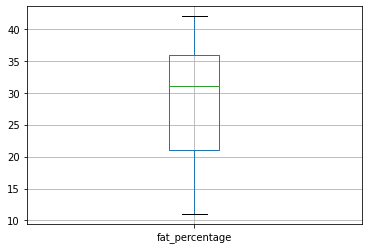

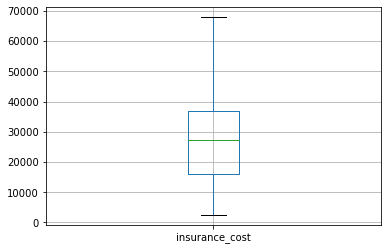

In [68]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plotSizeX = 12
plotSizeY = 6

for i in df_num.iloc[:, 1:].columns:
    df_num.iloc[:, 1:].boxplot(column=i)
    plt.show()

#### Analyzing : adventure_sports

0    22957
1     2043
Name: adventure_sports, dtype: int64 

0    0.91828
1    0.08172
Name: adventure_sports, dtype: float64 



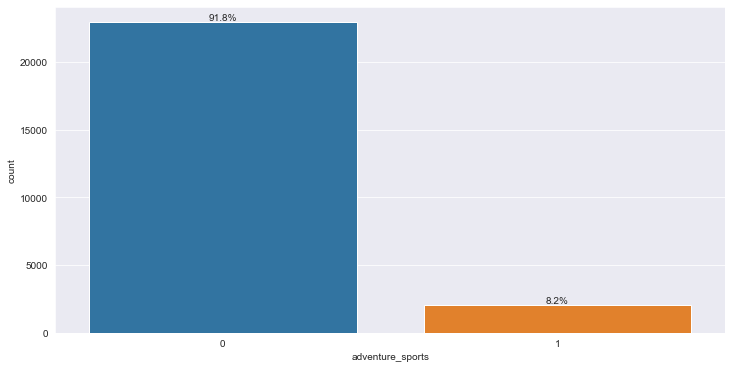

In [69]:
## Let us see the adventure_sports value counts
print(df_cat['adventure_sports'].value_counts(),'\n')
print(df_cat['adventure_sports'].value_counts(normalize=True),'\n')
sns.set_style("darkgrid")
plt.figure(figsize=(plotSizeX, plotSizeY))
ay=sns.countplot('adventure_sports',data=df_cat)
df_cat.adventure_sports.value_counts()

ncount=len(df_cat.adventure_sports)
    
for p in ay.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    
plt.show()

#### Analyzing : Occupation

Student     10169
Business    10020
Salried      4811
Name: Occupation, dtype: int64 

Student     0.40676
Business    0.40080
Salried     0.19244
Name: Occupation, dtype: float64 



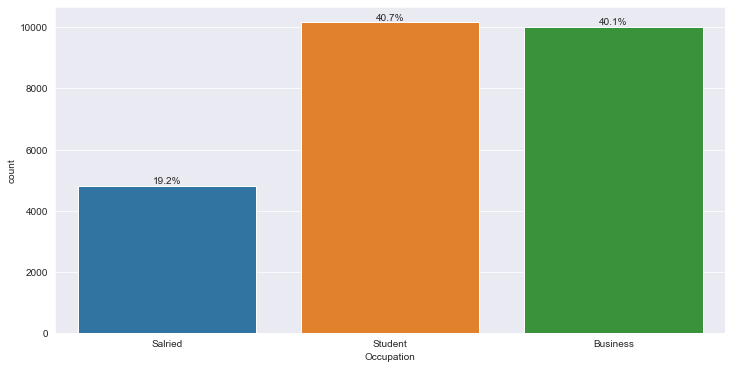

In [70]:
## Let us see the Occupation value counts
print(df_cat['Occupation'].value_counts(),'\n')
print(df_cat['Occupation'].value_counts(normalize=True),'\n')

plt.figure(figsize=(plotSizeX, plotSizeY))
ay=sns.countplot('Occupation',data=df_cat)
df_cat.Occupation.value_counts()

ncount=len(df_cat.Occupation)
    
for p in ay.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    
plt.show()

### Analyzing : cholesterol_level

150 to 175    8763
125 to 150    8339
200 to 225    2963
175 to 200    2881
225 to 250    2054
Name: cholesterol_level, dtype: int64 

150 to 175    0.35052
125 to 150    0.33356
200 to 225    0.11852
175 to 200    0.11524
225 to 250    0.08216
Name: cholesterol_level, dtype: float64 



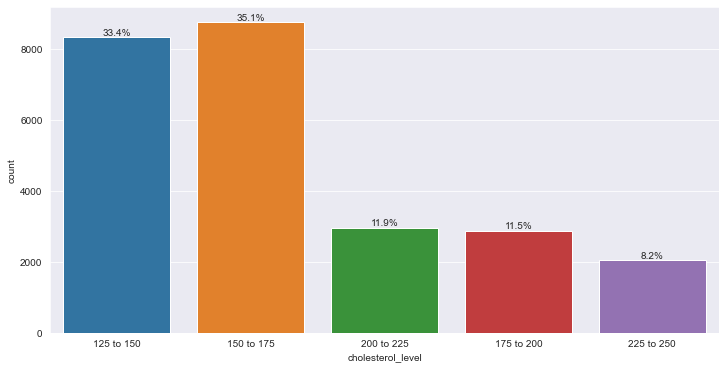

In [71]:
## Let us see the cholesterol_level value counts
print(df_cat['cholesterol_level'].value_counts(),'\n')
print(df_cat['cholesterol_level'].value_counts(normalize=True),'\n')

plt.figure(figsize=(plotSizeX, plotSizeY))
ay=sns.countplot('cholesterol_level',data=df_cat)
df_cat.cholesterol_level.value_counts()

ncount=len(df_cat.cholesterol_level)
    
for p in ay.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    
plt.show()

#### Analyzing : heart_decs_history

0    23634
1     1366
Name: heart_decs_history, dtype: int64 

0    0.94536
1    0.05464
Name: heart_decs_history, dtype: float64 



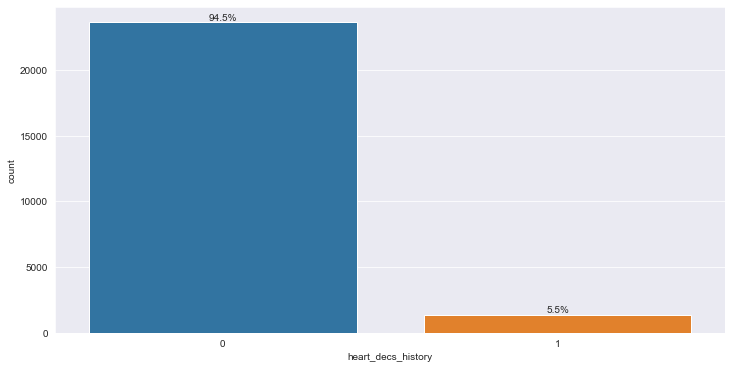

In [72]:
## Let us see the heart_decs_history value counts
print(df_cat['heart_decs_history'].value_counts(),'\n')
print(df_cat['heart_decs_history'].value_counts(normalize=True),'\n')

plt.figure(figsize=(plotSizeX, plotSizeY))
ay=sns.countplot('heart_decs_history',data=df_cat)
df_cat.heart_decs_history.value_counts()

ncount=len(df_cat.heart_decs_history)
    
for p in ay.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    
plt.show()

#### Analyzing : other_major_decs_history

0    22546
1     2454
Name: other_major_decs_history, dtype: int64 

0    0.90184
1    0.09816
Name: other_major_decs_history, dtype: float64 



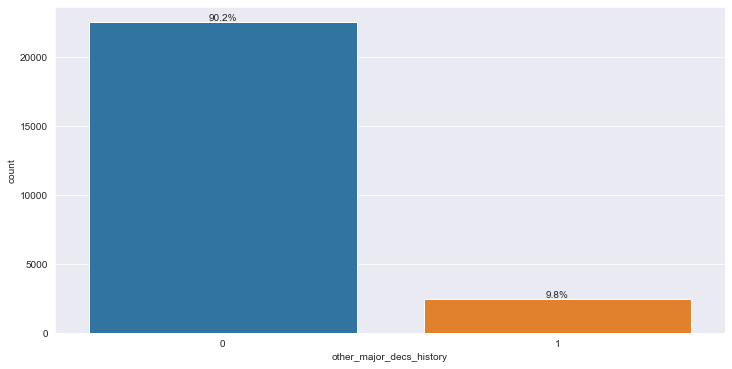

In [73]:
## Let us see the other_major_decs_history value counts
print(df_cat['other_major_decs_history'].value_counts(),'\n')
print(df_cat['other_major_decs_history'].value_counts(normalize=True),'\n')

plt.figure(figsize=(plotSizeX, plotSizeY))
ay=sns.countplot('other_major_decs_history',data=df_cat)
df_cat.other_major_decs_history.value_counts()

ncount=len(df_cat.other_major_decs_history)
    
for p in ay.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    
plt.show()

#### Analyzing : Gender

Male      16422
Female     8578
Name: Gender, dtype: int64 

Male      0.65688
Female    0.34312
Name: Gender, dtype: float64 



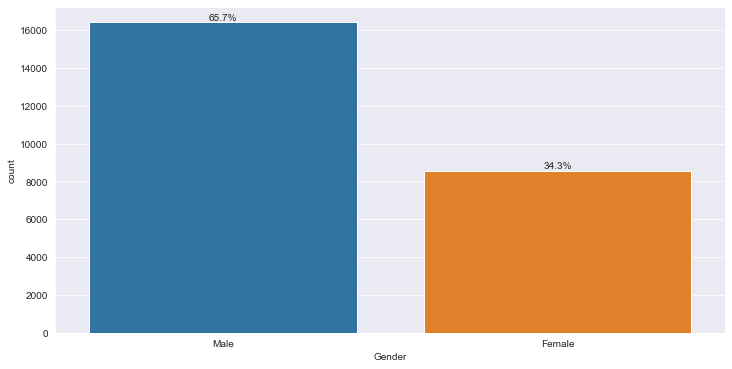

In [74]:
## Let us see the Gender value counts
print(df_cat['Gender'].value_counts(),'\n')
print(df_cat['Gender'].value_counts(normalize=True),'\n')

plt.figure(figsize=(plotSizeX, plotSizeY))
ay=sns.countplot('Gender',data=df_cat)
df_cat.Gender.value_counts()

ncount=len(df_cat.Gender)
    
for p in ay.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    
plt.show()

#### Analyzing : smoking_status

never smoked       9249
Unknown            7555
formerly smoked    4329
smokes             3867
Name: smoking_status, dtype: int64 

never smoked       0.36996
Unknown            0.30220
formerly smoked    0.17316
smokes             0.15468
Name: smoking_status, dtype: float64 



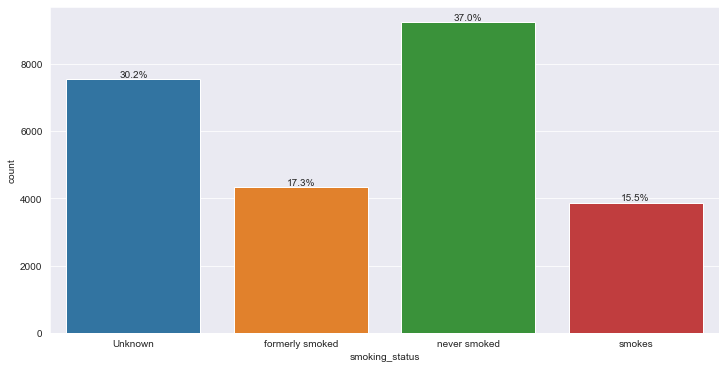

In [75]:
## Let us see the smoking_status value counts
print(df_cat['smoking_status'].value_counts(),'\n')
print(df_cat['smoking_status'].value_counts(normalize=True),'\n')

plt.figure(figsize=(plotSizeX, plotSizeY))
ay=sns.countplot('smoking_status',data=df_cat)
df_cat.smoking_status.value_counts()

ncount=len(df_cat.smoking_status)
    
for p in ay.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    
plt.show()

#### Analyzing : Location

Bangalore      1742
Jaipur         1706
Bhubaneswar    1704
Mangalore      1697
Delhi          1680
Ahmedabad      1677
Guwahati       1672
Chennai        1669
Kanpur         1664
Nagpur         1663
Mumbai         1658
Lucknow        1637
Pune           1622
Kolkata        1620
Surat          1589
Name: Location, dtype: int64 

Bangalore      0.06968
Jaipur         0.06824
Bhubaneswar    0.06816
Mangalore      0.06788
Delhi          0.06720
Ahmedabad      0.06708
Guwahati       0.06688
Chennai        0.06676
Kanpur         0.06656
Nagpur         0.06652
Mumbai         0.06632
Lucknow        0.06548
Pune           0.06488
Kolkata        0.06480
Surat          0.06356
Name: Location, dtype: float64 



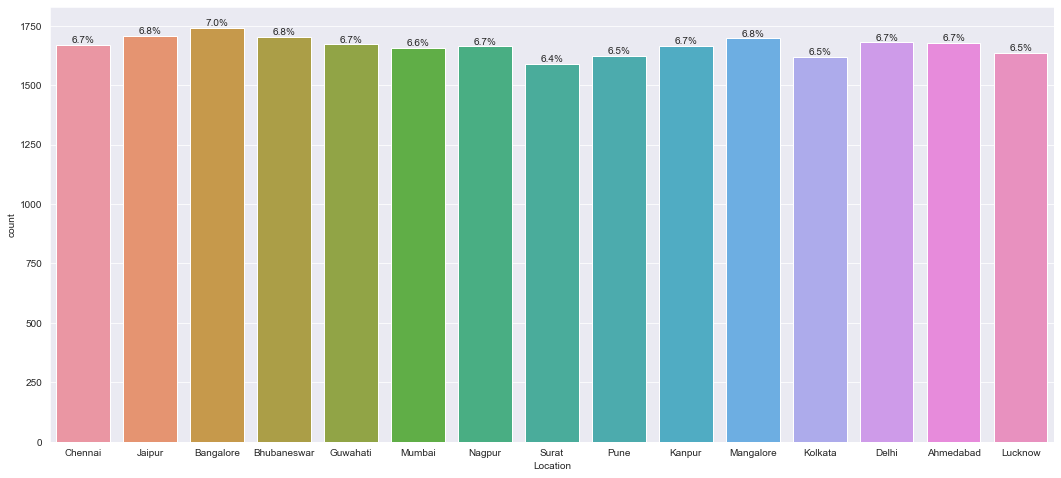

In [76]:
## Let us see the Location value counts
print(df_cat['Location'].value_counts(),'\n')
print(df_cat['Location'].value_counts(normalize=True),'\n')

plt.figure(figsize=(18,8))
ay=sns.countplot('Location',data=df_cat)
df_cat.Location.value_counts()

ncount=len(df_cat.Location)
    
for p in ay.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    
plt.show()

#### Analyzing : covered_by_any_other_company

N    17418
Y     7582
Name: covered_by_any_other_company, dtype: int64 

N    0.69672
Y    0.30328
Name: covered_by_any_other_company, dtype: float64 



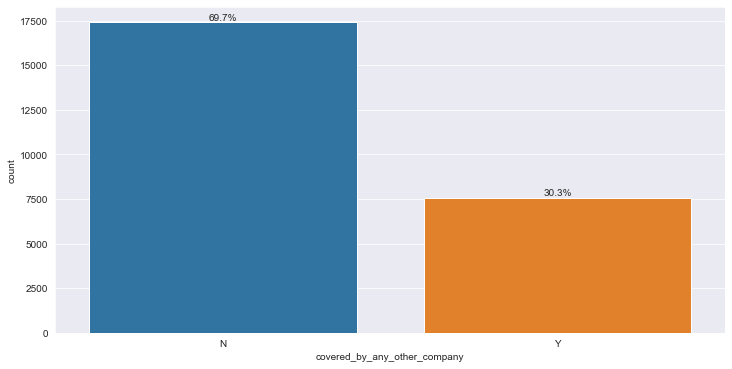

In [77]:
## Let us see the covered_by_any_other_company value counts
print(df_cat['covered_by_any_other_company'].value_counts(),'\n')
print(df_cat['covered_by_any_other_company'].value_counts(normalize=True),'\n')

plt.figure(figsize=(plotSizeX, plotSizeY))
ay=sns.countplot('covered_by_any_other_company',data=df_cat)
df_cat.covered_by_any_other_company.value_counts()

ncount=len(df_cat.covered_by_any_other_company)
    
for p in ay.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    
plt.show()

#### Analyzing : Alcohol

Rare     13752
No        8541
Daily     2707
Name: Alcohol, dtype: int64 

Rare     0.55008
No       0.34164
Daily    0.10828
Name: Alcohol, dtype: float64 



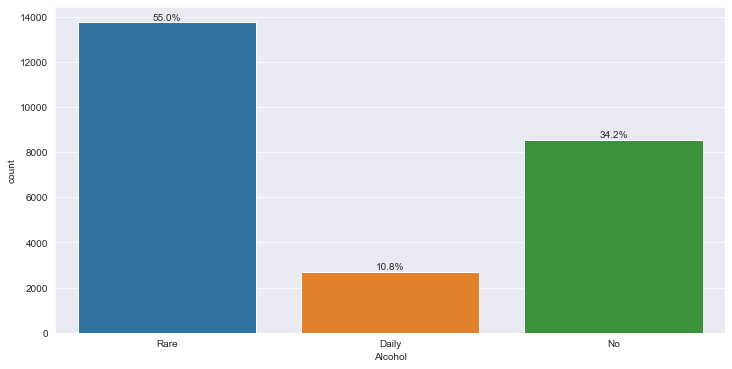

In [78]:
## Let us see the Alcohol value counts
print(df_cat['Alcohol'].value_counts(),'\n')
print(df_cat['Alcohol'].value_counts(normalize=True),'\n')

plt.figure(figsize=(plotSizeX, plotSizeY))
ay=sns.countplot('Alcohol',data=df_cat)
df_cat.Alcohol.value_counts()

ncount=len(df_cat.Alcohol)
    
for p in ay.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    
plt.show()

#### Analyzing : exercise

Moderate    14638
Extreme      5248
No           5114
Name: exercise, dtype: int64 

Moderate    0.58552
Extreme     0.20992
No          0.20456
Name: exercise, dtype: float64 



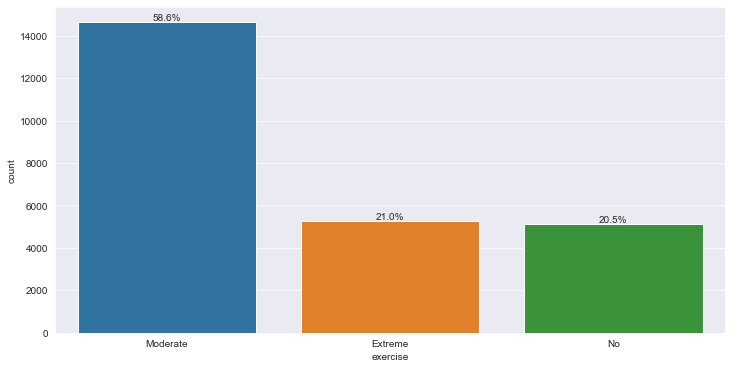

In [79]:
## Let us see the exercise value counts
print(df_cat['exercise'].value_counts(),'\n')
print(df_cat['exercise'].value_counts(normalize=True),'\n')

plt.figure(figsize=(plotSizeX, plotSizeY))
ay=sns.countplot('exercise',data=df_cat)
df_cat.exercise.value_counts()

ncount=len(df_cat.exercise)
    
for p in ay.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    
plt.show()

#### Analyzing : admitted_status

Yes    13119
No     11881
Name: admitted_status, dtype: int64 

Yes    0.52476
No     0.47524
Name: admitted_status, dtype: float64 



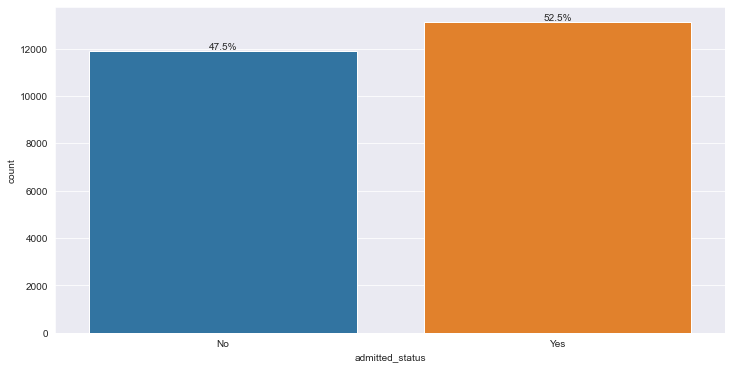

In [80]:
## Let us see the exercise value counts
print(df_cat['admitted_status'].value_counts(),'\n')
print(df_cat['admitted_status'].value_counts(normalize=True),'\n')

plt.figure(figsize=(plotSizeX, plotSizeY))
ay=sns.countplot('admitted_status',data=df_cat)
df_cat.admitted_status.value_counts()

ncount=len(df_cat.admitted_status)
    
for p in ay.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ay.annotate('{:.1f}%'.format(100.*y/ncount),(x.mean(),y),ha="center",va="bottom")
    
plt.show()

#### Analyzing : years_of_insurance_with_us

In [81]:
df['years_of_insurance_with_us'].value_counts()

3    2990
8    2970
5    2941
0    2912
7    2873
1    2856
4    2846
6    2804
2    1808
Name: years_of_insurance_with_us, dtype: int64

<AxesSubplot:xlabel='years_of_insurance_with_us', ylabel='count'>

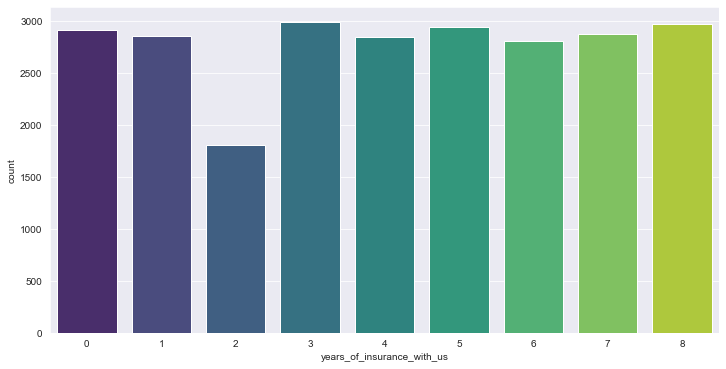

In [82]:
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.countplot(df.years_of_insurance_with_us,palette="viridis")

<AxesSubplot:xlabel='years_of_insurance_with_us', ylabel='Density'>

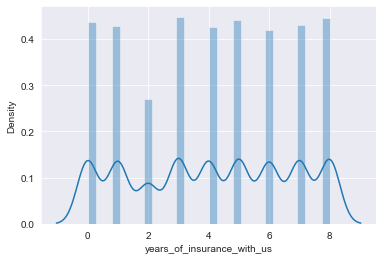

In [83]:
sns.distplot(df.years_of_insurance_with_us)

* There are almost 3000 new customer who brought the insurance plan in current year
* less number of customer for 2 year catagory

#### Analyzing : visited_doctor_last_1_year

In [84]:
df['visited_doctor_last_1_year'].value_counts()

2     8669
3     7094
4     6708
5     1265
6      546
1      432
7      189
8       76
9       13
10       6
0        1
12       1
Name: visited_doctor_last_1_year, dtype: int64

<AxesSubplot:xlabel='visited_doctor_last_1_year', ylabel='count'>

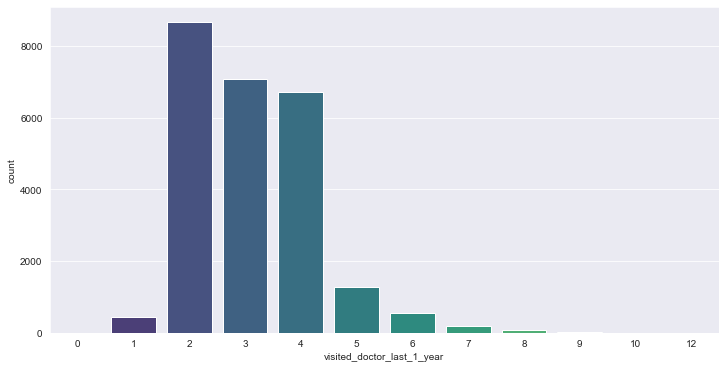

In [85]:

plt.figure(figsize=(plotSizeX, plotSizeY))
sns.countplot(df.visited_doctor_last_1_year,palette="viridis")

#### Analyzing : regular_checkup_lasy_year

In [86]:
df['regular_checkup_lasy_year'].value_counts()

0    15215
1     4644
2     2198
3     1818
4      777
5      348
Name: regular_checkup_lasy_year, dtype: int64

<AxesSubplot:xlabel='regular_checkup_lasy_year', ylabel='count'>

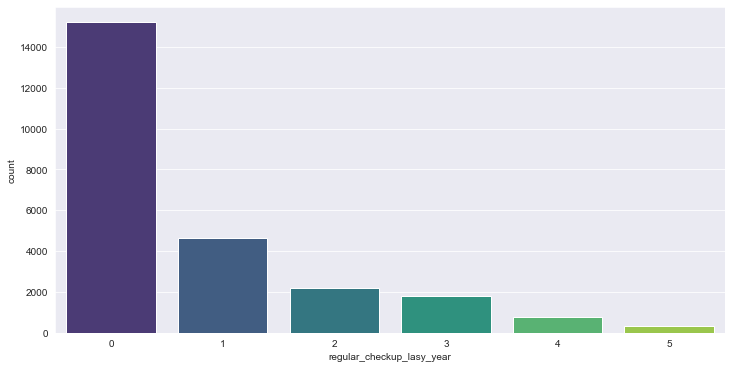

In [87]:

plt.figure(figsize=(plotSizeX, plotSizeY))
sns.countplot(df.regular_checkup_lasy_year,palette="viridis")

<AxesSubplot:xlabel='regular_checkup_lasy_year', ylabel='Density'>

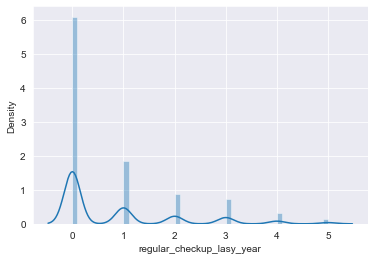

In [88]:
sns.distplot(df.regular_checkup_lasy_year)

* mejority of insurer do not undergo health checkup

#### Analyzing : daily_avg_steps

Skewness is : 0.9088668029213214


count    25000.000000
mean      5215.889320
std       1053.179748
min       2034.000000
25%       4543.000000
50%       5089.000000
75%       5730.000000
max      11255.000000
Name: daily_avg_steps, dtype: float64

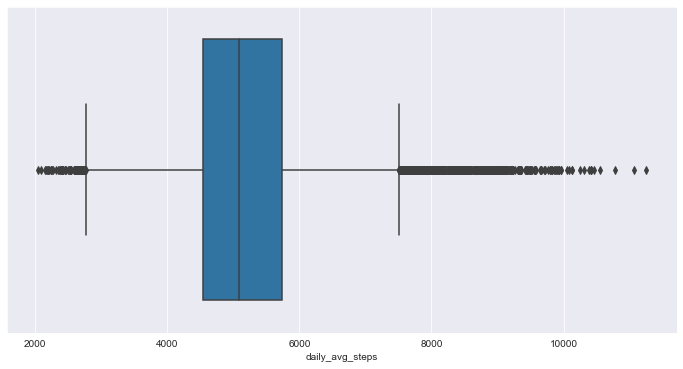

In [89]:
#Data do not have outlier as visible from plot
plt.figure(figsize=(plotSizeX, plotSizeY))
print("Skewness is :",df.daily_avg_steps.skew())
sns.boxplot(df.daily_avg_steps)
df.daily_avg_steps.describe()

<AxesSubplot:xlabel='daily_avg_steps', ylabel='Density'>

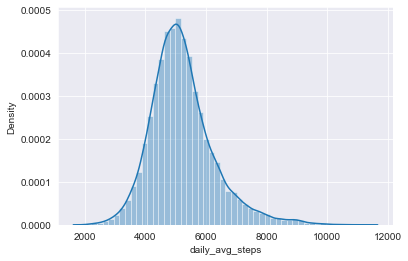

In [90]:
sns.distplot(df.daily_avg_steps)

In [91]:
#no. of data points with daily_avg_steps greater than 7000
df[df['daily_avg_steps']>7000]

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,admitted_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
7,5007,1,0,0,Student,4,150 to 175,7448,46,0,0,Female,245,26.0,smokes,No,Chennai,72,N,Rare,Moderate,0,34,29616
13,5013,6,1,0,Business,2,150 to 175,7089,30,0,0,Male,247,38.9,formerly smoked,Yes,Surat,75,Y,Rare,Moderate,1,21,37020
28,5028,3,1,0,Salried,1,125 to 150,7887,65,0,1,Female,157,23.2,formerly smoked,No,Kolkata,52,N,Rare,Moderate,6,18,3702
37,5037,0,1,0,Business,8,175 to 200,7057,62,0,0,Female,82,31.4,Unknown,No,Bhubaneswar,74,N,Daily,Extreme,2,37,23446
38,5038,5,0,0,Student,4,125 to 150,7164,18,0,0,Male,100,34.8,never smoked,Yes,Kolkata,57,N,Rare,Moderate,6,33,7404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24931,29931,5,0,0,Student,4,125 to 150,8085,62,0,0,Male,122,25.9,Unknown,Yes,Nagpur,62,N,No,Extreme,3,16,6170
24964,29964,1,0,0,Business,2,150 to 175,7951,50,0,0,Male,70,32.4,never smoked,No,Mangalore,62,N,No,Moderate,5,21,8638
24987,29987,4,0,0,Student,4,125 to 150,7994,19,0,1,Male,187,42.0,Unknown,Yes,Lucknow,64,Y,No,Moderate,0,33,18510
24988,29988,8,1,1,Salried,2,225 to 250,8136,64,0,0,Male,206,38.4,smokes,Yes,Lucknow,76,N,Rare,No,3,13,34552


* there are outlier in the dataset for this variable

#### Analyzing : age

Skewness is : 0.01386002805629118


count    25000.000000
mean        44.918320
std         16.107492
min         16.000000
25%         31.000000
50%         45.000000
75%         59.000000
max         74.000000
Name: age, dtype: float64

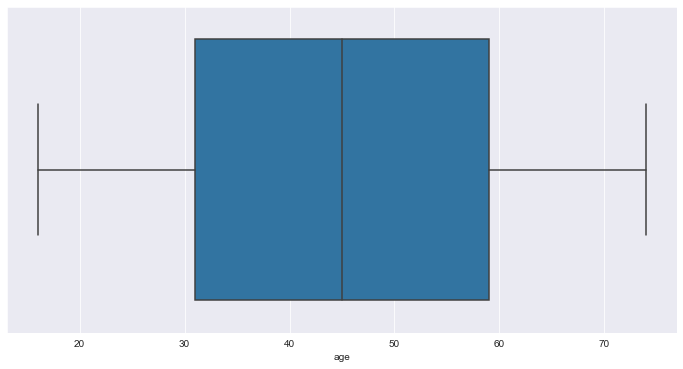

In [92]:
#Data do not have outlier as visible from plot
plt.figure(figsize=(plotSizeX, plotSizeY))
print("Skewness is :",df.age.skew())
sns.boxplot(df.age)
df.age.describe()

<AxesSubplot:xlabel='age', ylabel='Density'>

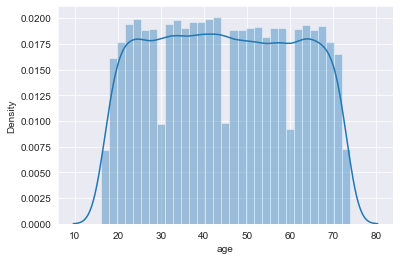

In [93]:
sns.distplot(df.age)

#### Analyzing : admitted_status

In [94]:
df.admitted_status.value_counts()

Yes    13119
No     11881
Name: admitted_status, dtype: int64

<AxesSubplot:xlabel='admitted_status', ylabel='count'>

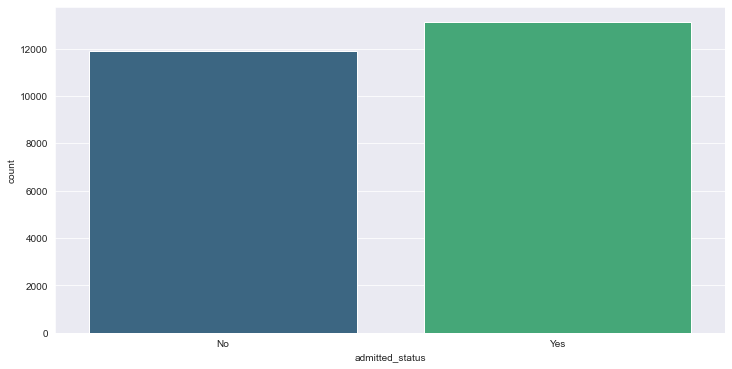

In [95]:
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.countplot(df.admitted_status,palette="viridis")

#### Analyzing : avg_glucose_level'

Skewness is : -0.0063894976867661995


count    25000.000000
mean       167.530000
std         62.729712
min         57.000000
25%        113.000000
50%        168.000000
75%        222.000000
max        277.000000
Name: avg_glucose_level, dtype: float64

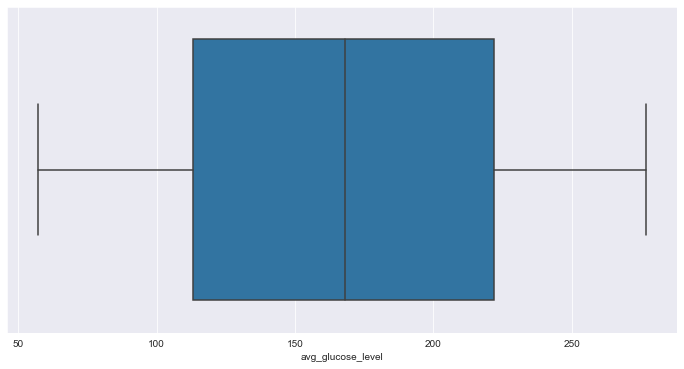

In [96]:
plt.figure(figsize=(plotSizeX, plotSizeY))
print("Skewness is :",df.avg_glucose_level.skew())
sns.boxplot(df.avg_glucose_level)
df.avg_glucose_level.describe()

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

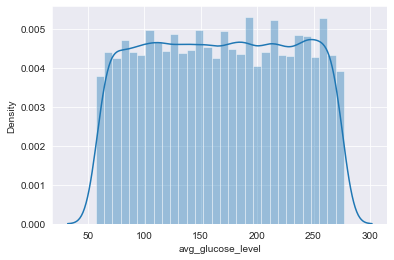

In [97]:
sns.distplot(df.avg_glucose_level)

#### Analyzing : bmi

Skewness is : 1.079720317836927


count    25000.000000
mean        31.360660
std          7.737814
min         12.300000
25%         26.200000
50%         30.700000
75%         35.300000
max        100.600000
Name: bmi, dtype: float64

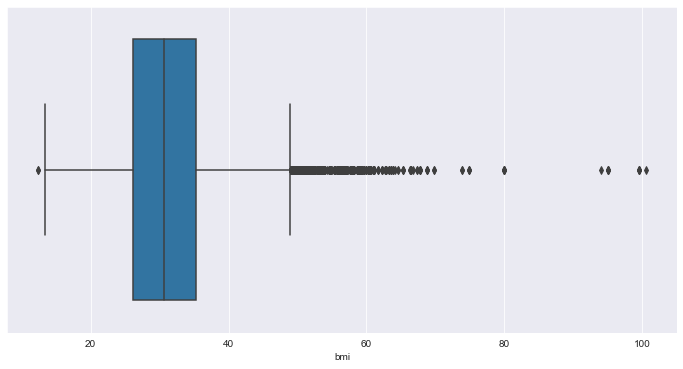

In [98]:
plt.figure(figsize=(plotSizeX, plotSizeY))
print("Skewness is :",df.bmi.skew())
sns.boxplot(df.bmi)
df.bmi.describe()

<AxesSubplot:xlabel='bmi', ylabel='Density'>

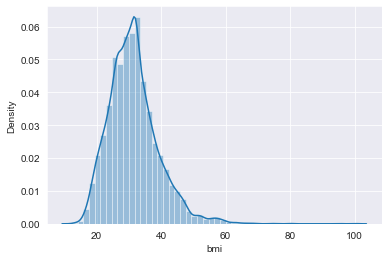

In [99]:
sns.distplot(df.bmi)

In [100]:
print('0.5% insurere have bmi lower than :',np.percentile(df.bmi, 0.5))
print('1.0% insurere have bmi lower than :',np.percentile(df.bmi, 1))
print('5% insurere have bmi lower than :',np.percentile(df.bmi, 5))
print('10% insurere have bmi lower than :',np.percentile(df.bmi, 10))
print('90% insurere have bmi lower than :',np.percentile(df.bmi, 90))
print('95% insurere have bmi lower than :',np.percentile(df.bmi, 95))
print('99% insurere have bmi lower than :',np.percentile(df.bmi, 99))
print('99.7% insurere have bmi lower than :',np.percentile(df.bmi, 99.7))

0.5% insurere have bmi lower than : 16.6995
1.0% insurere have bmi lower than : 17.5
5% insurere have bmi lower than : 20.3
10% insurere have bmi lower than : 22.2
90% insurere have bmi lower than : 41.2
95% insurere have bmi lower than : 45.2
99% insurere have bmi lower than : 55.8
99.7% insurere have bmi lower than : 60.9


In [101]:
#no. of data points with bmi greater than 59
dfx=df[df['bmi']>60.9]

In [102]:
dfx.insurance_cost.argmax()

44

In [103]:
dfx.iloc[dfx.insurance_cost.argmax()]

applicant_id                             21707
years_of_insurance_with_us                   4
regular_checkup_lasy_year                    0
adventure_sports                             0
Occupation                            Business
visited_doctor_last_1_year                   3
cholesterol_level                   200 to 225
daily_avg_steps                           5131
age                                         30
heart_decs_history                           0
other_major_decs_history                     0
Gender                                    Male
avg_glucose_level                          250
bmi                                       65.3
smoking_status                    never smoked
admitted_status                            Yes
Location                             Ahmedabad
weight                                      91
covered_by_any_other_company                 N
Alcohol                                   Rare
exercise                              Moderate
weight_change

* almost 99 percent of insurere have BMI less than 56 
* here are some outlier values in dataset which we need to treat before model building
* Customer having highest insurance cost is 30 year old Male.who never smoke, taking rare alcohole,having high glucose level and business person recident of Ahmdabad.

#### Analyzing : weight

Skewness is : 0.10907674112354979


count    25000.000000
mean        71.610480
std          9.325183
min         52.000000
25%         64.000000
50%         72.000000
75%         78.000000
max         96.000000
Name: weight, dtype: float64

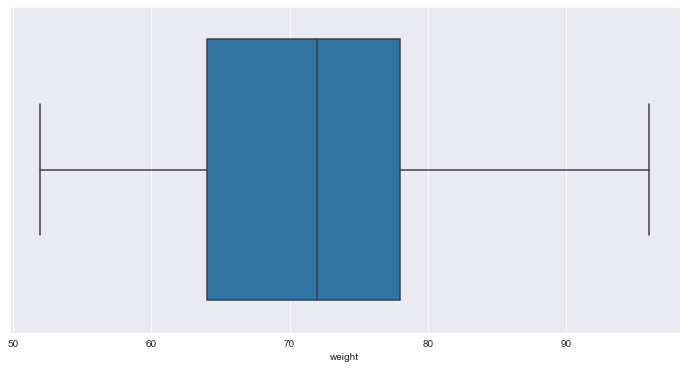

In [104]:
plt.figure(figsize=(plotSizeX, plotSizeY))
print("Skewness is :",df.weight.skew())
sns.boxplot(df.weight)
df.weight.describe()

<AxesSubplot:xlabel='weight', ylabel='Density'>

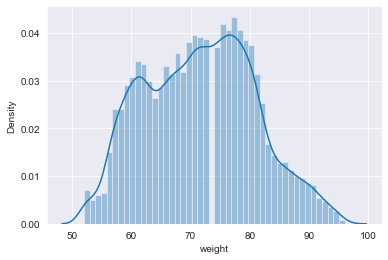

In [105]:
sns.distplot(df.weight)

* No outlier in dataset for weight variable.
* 52 to 96 year is the range of insurer age
* median age is 72 year

#### Analyzing: weight_change_in_last_one_year

In [106]:
df.weight_change_in_last_one_year.unique()

array([1, 3, 0, 2, 4, 5, 6], dtype=int64)

In [107]:
df.weight_change_in_last_one_year.value_counts()

4    5076
3    5006
2    4037
0    4012
1    3925
5    2036
6     908
Name: weight_change_in_last_one_year, dtype: int64

<AxesSubplot:xlabel='weight_change_in_last_one_year', ylabel='count'>

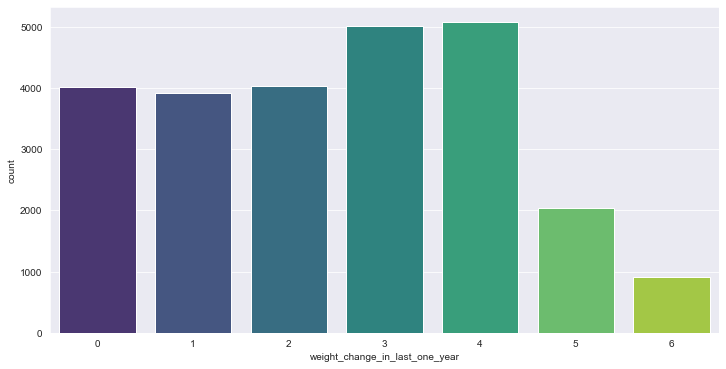

In [108]:
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.countplot(df.weight_change_in_last_one_year,palette="viridis")

In [109]:
#no. of data points with weight_change_in_last_one_year greater than 5 
df_w_change=df[df['weight_change_in_last_one_year'] >5]
df_w_change

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,admitted_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
28,5028,3,1,0,Salried,1,125 to 150,7887,65,0,1,Female,157,23.2,formerly smoked,No,Kolkata,52,N,Rare,Moderate,6,18,3702
35,5035,0,1,0,Student,4,150 to 175,5553,29,0,0,Male,84,32.5,smokes,No,Nagpur,56,N,Rare,Moderate,6,34,4936
38,5038,5,0,0,Student,4,125 to 150,7164,18,0,0,Male,100,34.8,never smoked,Yes,Kolkata,57,N,Rare,Moderate,6,33,7404
99,5099,3,0,0,Business,3,150 to 175,4735,38,0,0,Female,175,29.2,never smoked,Yes,Bangalore,53,N,Rare,Moderate,6,36,17276
117,5117,5,0,0,Business,3,200 to 225,4417,69,0,0,Female,250,20.4,Unknown,Yes,Surat,55,N,No,Moderate,6,42,7404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24887,29887,6,0,0,Salried,3,225 to 250,3686,29,0,0,Female,217,21.3,never smoked,Yes,Bhubaneswar,54,N,Rare,Moderate,6,31,7404
24897,29897,8,0,0,Salried,4,225 to 250,4250,73,0,0,Male,70,26.0,never smoked,Yes,Pune,52,N,Rare,Moderate,6,41,4936
24902,29902,0,0,0,Business,2,200 to 225,5357,67,0,1,Male,145,95.0,never smoked,No,Bangalore,53,N,No,Moderate,6,22,3702
24934,29934,0,0,0,Business,2,150 to 175,5128,26,0,0,Female,165,31.1,smokes,No,Surat,53,N,Rare,Extreme,6,21,3702


In [110]:
df_w_change.describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,908.0,17566.919604,7197.953655,5028.0,11577.500,17382.0,23925.25,29961.0
years_of_insurance_with_us,908.0,3.981278,2.604102,0.0,2.000,4.0,6.00,8.0
regular_checkup_lasy_year,908.0,0.621145,1.095080,0.0,0.000,0.0,1.00,5.0
visited_doctor_last_1_year,908.0,3.001101,1.084622,1.0,2.000,3.0,4.00,8.0
daily_avg_steps,908.0,5245.049559,1050.409787,2400.0,4599.750,5117.0,5747.00,10412.0
age,908.0,44.909692,15.979887,16.0,31.000,45.0,58.00,74.0
avg_glucose_level,908.0,169.834802,62.221864,57.0,116.000,171.0,224.00,276.0
bmi,908.0,31.414207,7.892000,13.3,26.475,30.6,35.40,95.0
weight,908.0,54.552863,1.742036,52.0,53.000,55.0,56.00,57.0
weight_change_in_last_one_year,908.0,6.000000,0.000000,6.0,6.000,6.0,6.00,6.0


*  908 customer have weight change more than 5 kg

#### Analyzing : fat_percentage

Skewness is : -0.3632615312279769


count    25000.000000
mean        28.812280
std          8.632382
min         11.000000
25%         21.000000
50%         31.000000
75%         36.000000
max         42.000000
Name: fat_percentage, dtype: float64

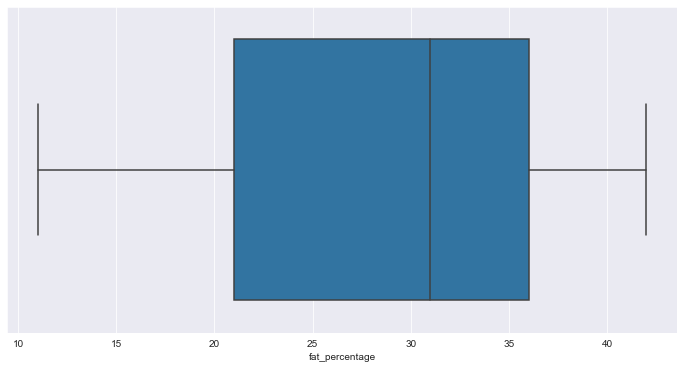

In [111]:
plt.figure(figsize=(plotSizeX, plotSizeY))
print("Skewness is :",df.fat_percentage.skew())
sns.boxplot(df.fat_percentage)
df.fat_percentage.describe()

<AxesSubplot:xlabel='fat_percentage', ylabel='Count'>

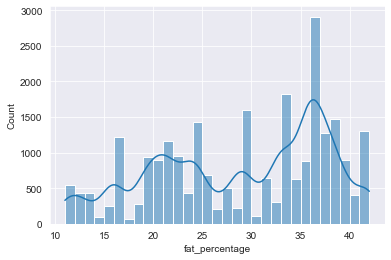

In [112]:
sns.histplot(df.fat_percentage,kde=True)

#### Analyzing : insurance_cost

Skewness is : 0.3316500625115993


count    25000.000000
mean     27147.407680
std      14323.691832
min       2468.000000
25%      16042.000000
50%      27148.000000
75%      37020.000000
max      67870.000000
Name: insurance_cost, dtype: float64

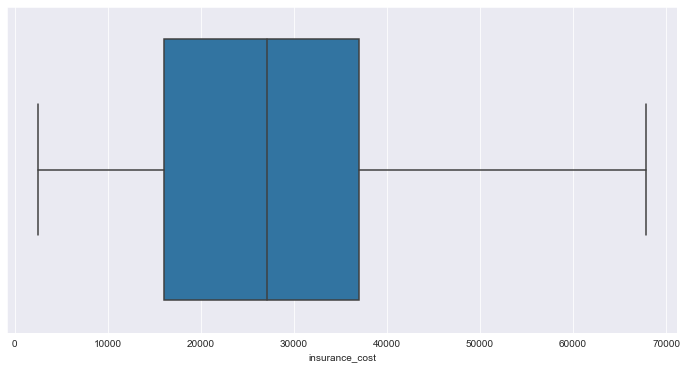

In [113]:
plt.figure(figsize=(plotSizeX, plotSizeY))
print("Skewness is :",df.insurance_cost.skew())
sns.boxplot(df.insurance_cost)
df.insurance_cost.describe()

<AxesSubplot:xlabel='insurance_cost', ylabel='Density'>

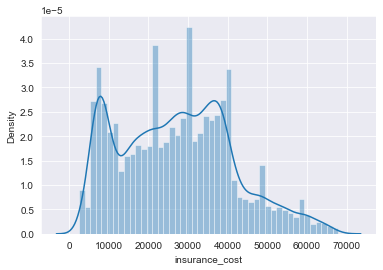

In [114]:
sns.distplot(df.insurance_cost,kde=True)

### Bivariate Analysis 

In [115]:
df_num.columns

Index(['applicant_id', 'years_of_insurance_with_us',
       'regular_checkup_lasy_year', 'visited_doctor_last_1_year',
       'daily_avg_steps', 'age', 'avg_glucose_level', 'bmi', 'weight',
       'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost'],
      dtype='object')

In [116]:
df.corrwith(df.insurance_cost)

applicant_id                      0.002585
years_of_insurance_with_us        0.001404
regular_checkup_lasy_year        -0.174005
visited_doctor_last_1_year        0.008890
daily_avg_steps                  -0.006565
age                               0.005195
avg_glucose_level                -0.005007
bmi                              -0.007875
weight                            0.970357
weight_change_in_last_one_year   -0.342710
fat_percentage                   -0.008486
insurance_cost                    1.000000
dtype: float64

In [117]:
# # Pairplot for analyzing the distribution of each varible and to check the multicoliniarity amongs the variables
# sns.pairplot(df,diag_kind='kde') 

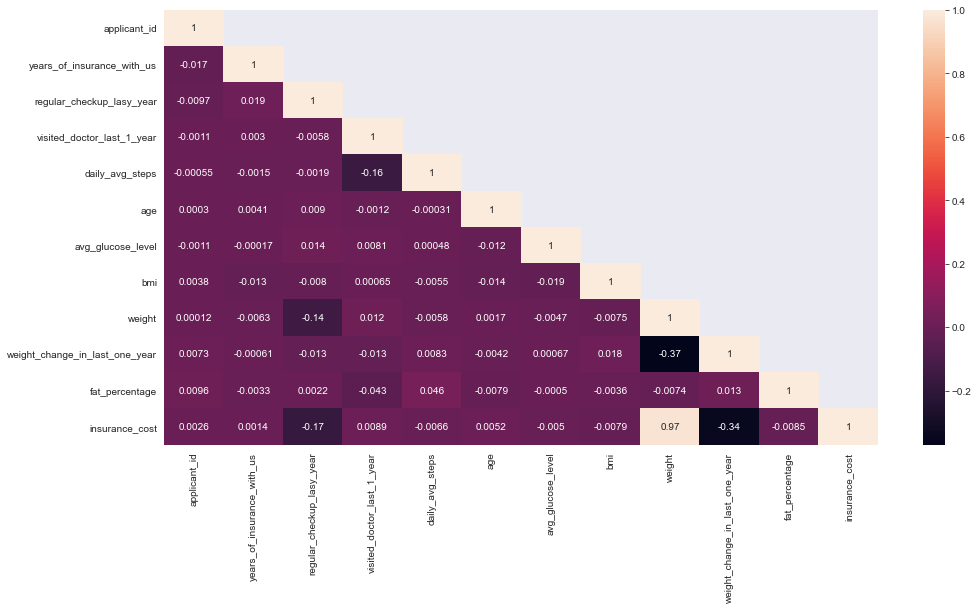

In [118]:
# heatmap for corelation values
corr = df.corr()
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,mask=np.triu(corr,+1));

#### Analyzing : Numerical variable vs insurance_cost

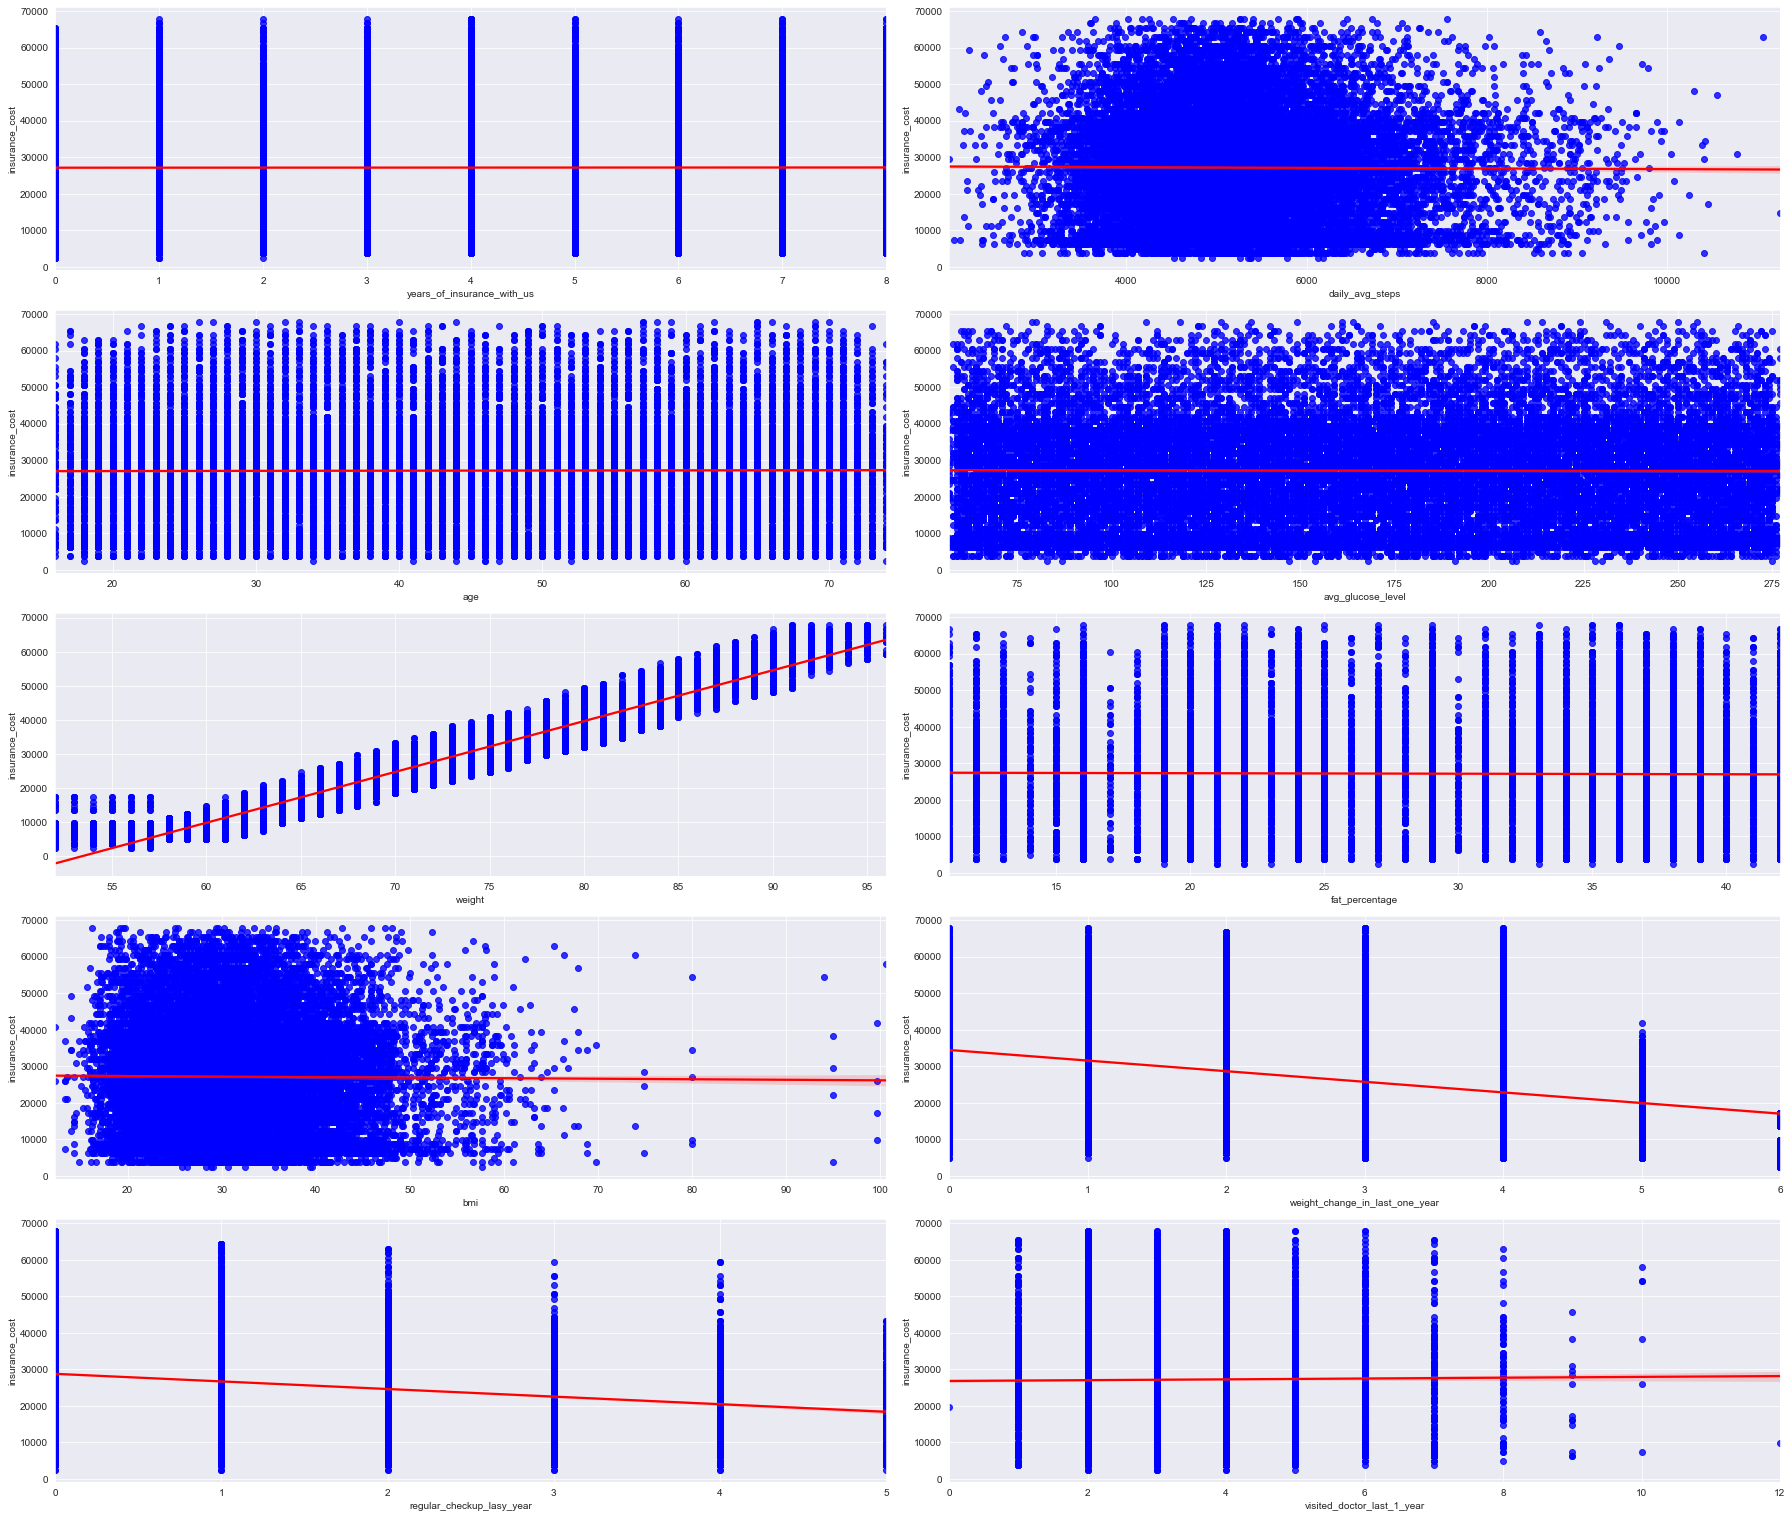

In [119]:
sns.set_style('darkgrid')
plt.subplots(figsize=(25,25))
plt.subplot(6,2,1)
sns.regplot(x="years_of_insurance_with_us", y="insurance_cost", data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
# plt.title('Boxplot')
plt.subplot(6,2,2)
sns.regplot(x="daily_avg_steps", y="insurance_cost", data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.subplot(6,2,3)
sns.regplot(x="age", y="insurance_cost", data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.subplot(6,2,4)
sns.regplot(x="avg_glucose_level", y="insurance_cost", data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.subplot(6,2,5)
sns.regplot(x="weight", y="insurance_cost", data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.subplot(6,2,6)
sns.regplot(x="fat_percentage", y="insurance_cost", data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.subplot(6,2,7)
sns.regplot(x="bmi", y="insurance_cost", data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.subplot(6,2,8)
sns.regplot(x="weight_change_in_last_one_year", y="insurance_cost", data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.subplot(6,2,9)
sns.regplot(x="regular_checkup_lasy_year", y="insurance_cost", data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.subplot(6,2,10)
sns.regplot(x="visited_doctor_last_1_year", y="insurance_cost", data=df,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.tight_layout()


* Weight is the only variable which shows significant correlation with the insurance cost
* There are other variable like weight change in last one year and regular checkup last year shows negative correlation with insurance cost

AxesSubplot(0.125,0.125;0.775x0.755)


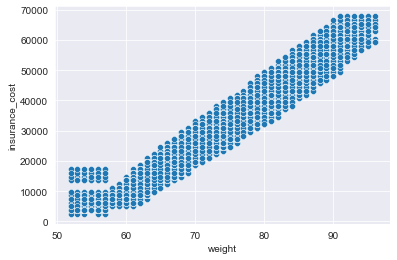

In [120]:
print(sns.scatterplot(df['weight'],df['insurance_cost']))

In [121]:
df[(df.Alcohol=='No') & (df.smoking_status=='never smoked') & (df.exercise=='Moderate')].describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,1815.0,17477.753168,7275.068562,5006.0,11156.0,17745.0,23822.0,29981.0
years_of_insurance_with_us,1815.0,4.049036,2.632658,0.0,2.0,4.0,6.0,8.0
regular_checkup_lasy_year,1815.0,0.792287,1.210641,0.0,0.0,0.0,1.0,5.0
visited_doctor_last_1_year,1815.0,3.132231,1.151258,1.0,2.0,3.0,4.0,9.0
daily_avg_steps,1815.0,5105.814876,1032.424589,2252.0,4448.5,5004.0,5617.0,9561.0
age,1815.0,44.211570,16.019537,16.0,30.5,44.0,58.0,74.0
avg_glucose_level,1815.0,167.136088,62.040049,58.0,114.0,166.0,221.0,277.0
bmi,1815.0,32.508760,7.542723,16.1,27.4,31.4,36.1,95.0
weight,1815.0,71.721763,9.284268,52.0,64.0,72.0,78.0,96.0
weight_change_in_last_one_year,1815.0,2.561433,1.691945,0.0,1.0,3.0,4.0,6.0


In [122]:
df[(df.Alcohol=='Daily') & (df.smoking_status=='smokes')& (df.exercise=='No')].describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,82.0,16662.134146,6643.910840,5149.0,12125.000,16453.5,22272.000,29799.0
years_of_insurance_with_us,82.0,3.951220,2.642961,0.0,1.250,4.0,6.000,8.0
regular_checkup_lasy_year,82.0,0.707317,1.211955,0.0,0.000,0.0,1.000,5.0
visited_doctor_last_1_year,82.0,3.060976,1.069759,2.0,2.000,3.0,4.000,7.0
daily_avg_steps,82.0,5386.756098,1215.001383,2537.0,4670.000,5322.5,5827.750,9666.0
age,82.0,45.170732,15.937226,17.0,33.000,44.0,57.000,73.0
avg_glucose_level,82.0,162.634146,59.505890,59.0,122.000,158.0,213.000,273.0
bmi,82.0,31.093902,5.781374,21.6,26.475,31.3,33.925,46.4
weight,82.0,72.463415,9.507885,52.0,63.250,74.0,79.000,94.0
weight_change_in_last_one_year,82.0,2.231707,1.665175,0.0,1.000,2.0,4.000,6.0


* Average insurance cost is higher  for daily drinker, without excercise and smoking status smoke.

In [123]:
df_cat.columns

Index(['adventure_sports', 'Occupation', 'cholesterol_level',
       'heart_decs_history', 'other_major_decs_history', 'Gender',
       'smoking_status', 'admitted_status', 'Location',
       'covered_by_any_other_company', 'Alcohol', 'exercise'],
      dtype='object')

#### Analyzing insurance cost vs Occupation

,mean,median,size
Occupation,,,
Business,27270.045309,27148,10020
Salried,26896.634380,27148,4811
Student,27145.208968,27148,10169


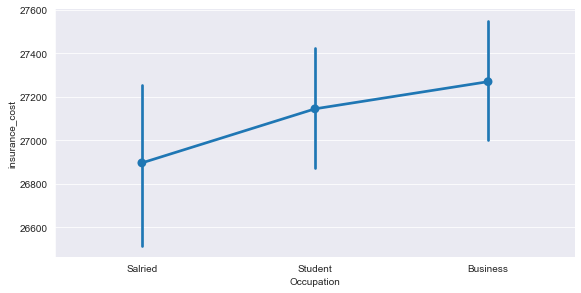

In [124]:
# insurance cost vs Occupation
print(sns.factorplot(x='Occupation',y='insurance_cost',data=df, size = 4, aspect = 2))
df.groupby('Occupation')['insurance_cost'].agg(['mean','median','size'])

#### Analyzing insurance cost vs Gender

,mean,median,size
Gender,,,
Female,27190.006062,27148,8578
Male,27125.156497,27148,16422


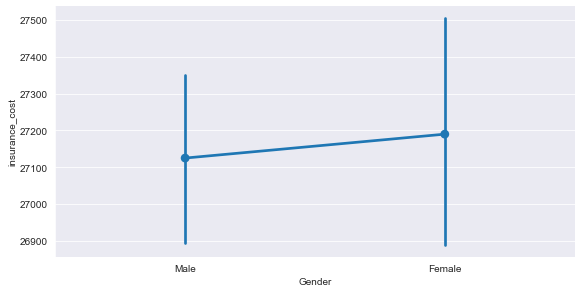

In [125]:
print(sns.factorplot(x='Gender',y='insurance_cost',data=df, size = 4, aspect = 2))
df.groupby('Gender')['insurance_cost'].agg(['mean','median','size'])

#### Analyzing insurance cost vs Alcohole

In [126]:
df.Alcohol

0         Rare
1         Rare
2        Daily
3         Rare
4           No
         ...  
24995     Rare
24996     Rare
24997     Rare
24998     Rare
24999       No
Name: Alcohol, Length: 25000, dtype: object

,mean,median,size
Alcohol,,,
Daily,26965.657924,27148,2707
No,27253.470085,27148,8541
Rare,27117.311518,27148,13752


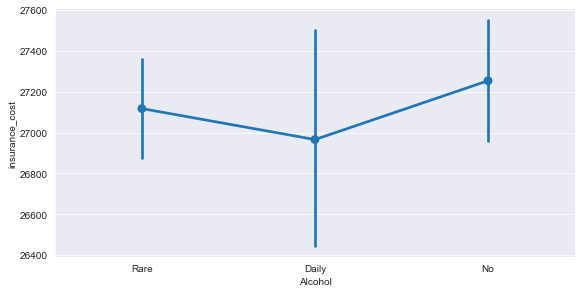

In [127]:

print(sns.factorplot(x='Alcohol',y='insurance_cost',data=df, size = 4, aspect = 2))
df.groupby('Alcohol')['insurance_cost'].agg(['mean','median','size'])

#### Analyzing insurance cost vs smoking status

,mean,median,size
smoking_status,,,
Unknown,27343.512641,27148,7555
formerly smoked,27052.221760,27148,4329
never smoked,27080.356147,27148,9249
smokes,27031.205586,27148,3867


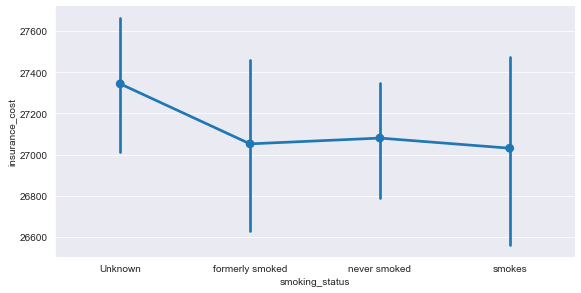

In [128]:

print(sns.factorplot(x='smoking_status',y='insurance_cost',data=df, size = 4, aspect = 2))
df.groupby('smoking_status')['insurance_cost'].agg(['mean','median','size'])

<AxesSubplot:xlabel='smoking_status', ylabel='insurance_cost'>

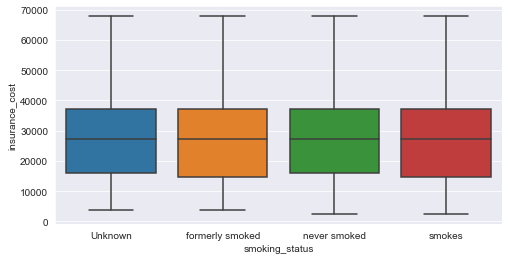

In [129]:
# insurance cost vs smoking status

plt.figure(figsize=(8,4))
sns.set_style('darkgrid')
sns.boxplot(x='smoking_status', y='insurance_cost', data=df)

#### Analyzing insurance cost vs Locations

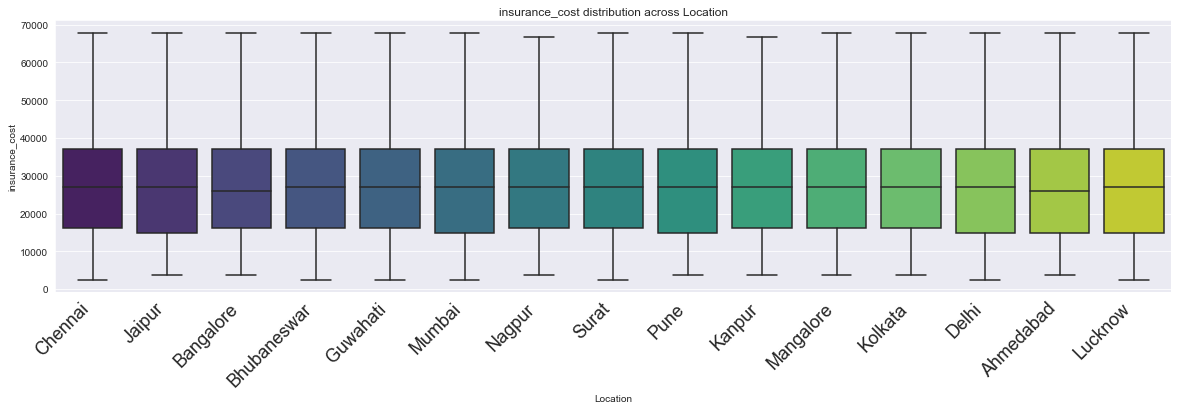

In [130]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Location", y="insurance_cost", data=df, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('insurance_cost distribution across Location')
chart;

In [131]:
df.groupby('Location')['insurance_cost'].agg(['mean','median','size'])

,mean,median,size
Location,,,
Ahmedabad,26650.573643,25914,1677
Bangalore,26729.346728,25914,1742
Bhubaneswar,27488.363850,27148,1704
Chennai,27475.538646,27148,1669
Delhi,26810.119048,27148,1680
Guwahati,27503.734450,27148,1672
Jaipur,27139.320047,27148,1706
Kanpur,26958.153846,27148,1664
Kolkata,27495.348148,27148,1620


In [132]:
df.insurance_cost.mean()

27147.40768

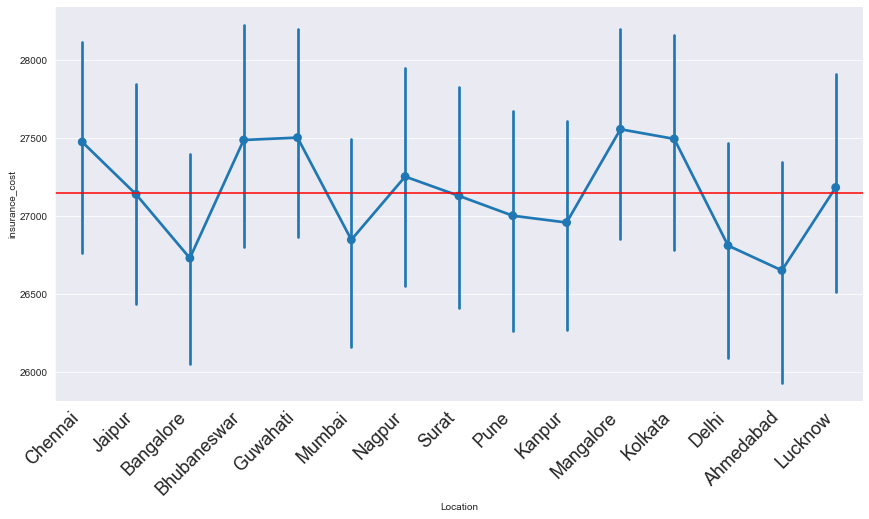

In [133]:
# fig, ax1 = plt.subplots(figsize=(plotSizeX, plotSizeY))
df.groupby('Location')['insurance_cost'].agg(['mean','median','size'])
chart=sns.factorplot(x='Location',y='insurance_cost',data=df, size = 6, aspect = 2)
chart.set_xticklabels( rotation=45, horizontalalignment='right', fontsize=18)
plt.axhline(y=df.insurance_cost.mean(), color="red")
plt.show()

* No outlier values for insurance cost across the differant locations
* Average insurance cost for mangalore and guwahati recedent insurer is high whereas it is less for ahmadabad and bangalore

<AxesSubplot:xlabel='weight_change_in_last_one_year', ylabel='count'>

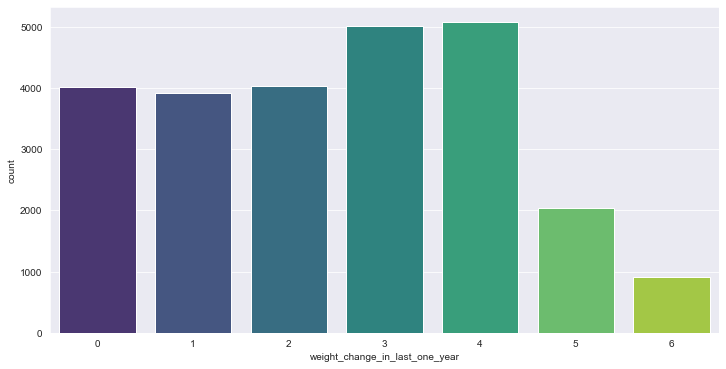

In [134]:
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.countplot(df.weight_change_in_last_one_year,palette="viridis")

#### Analyzing insurance cost vs exercise

,mean,median,size
exercise,,,
Extreme,27051.828887,27148,5248
Moderate,27273.355786,27148,14638
No,26884.984748,27148,5114


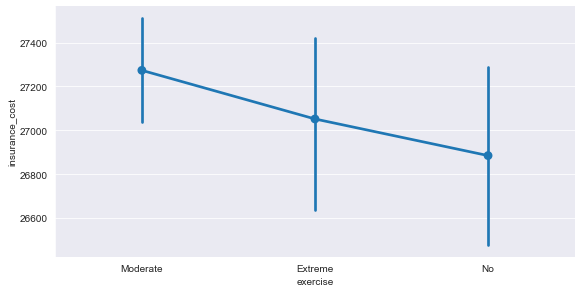

In [135]:

print(sns.factorplot(x='exercise',y='insurance_cost',data=df, size = 4, aspect = 2))
df.groupby('exercise')['insurance_cost'].agg(['mean','median','size'])

<AxesSubplot:xlabel='smoking_status', ylabel='insurance_cost'>

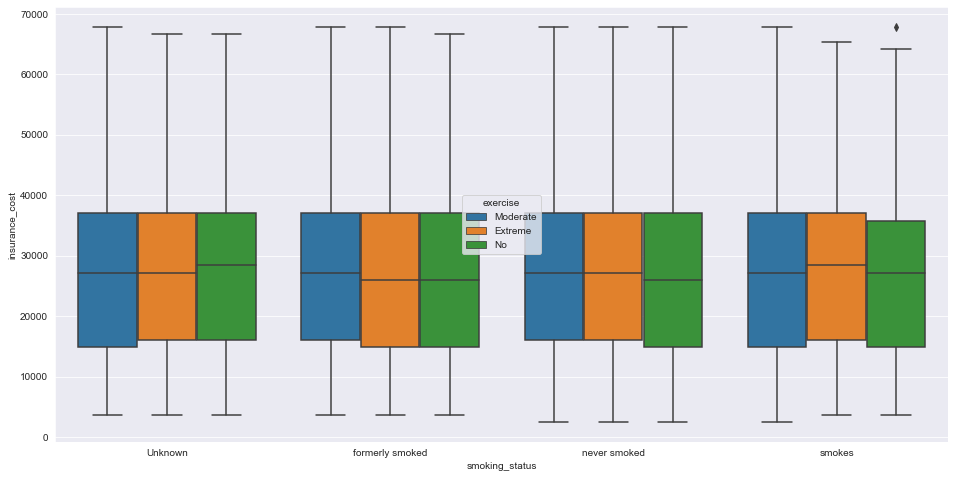

In [136]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.boxplot(x='smoking_status', y='insurance_cost',hue='exercise', data=df)

#### Analyzing cholesterol levels Vs insurance price

,mean,median,size
cholesterol_level,,,
125 to 150,27163.093896,27148,8339
150 to 175,27137.438548,27148,8763
175 to 200,26981.810482,27148,2881
200 to 225,27601.119136,28382,2963
225 to 250,26704.024343,25914,2054


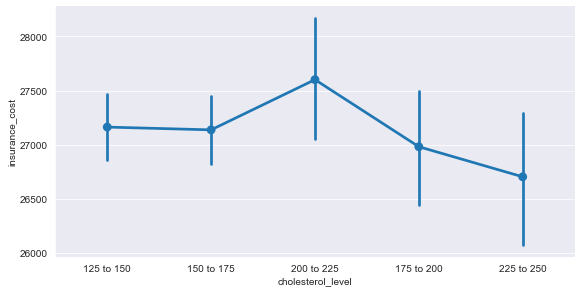

In [137]:
print(sns.factorplot(x='cholesterol_level',y='insurance_cost',data=df, size = 4, aspect = 2))
df.groupby('cholesterol_level')['insurance_cost'].agg(['mean','median','size'])

<AxesSubplot:xlabel='cholesterol_level', ylabel='insurance_cost'>

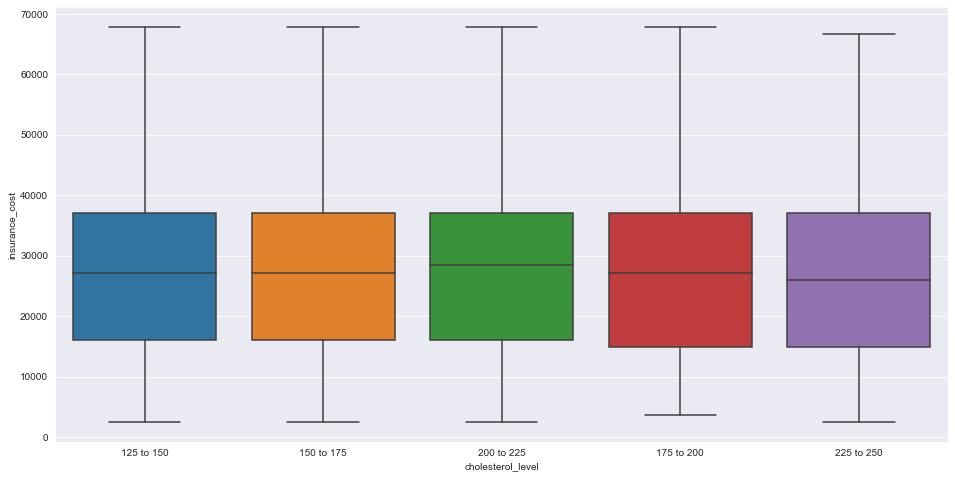

In [138]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.boxplot(x='cholesterol_level', y='insurance_cost', data=df)

* Average insurance cost for 225 to 250 cholesterol level is lower than other levels.(doutfull)

#### Analyzing Insurance cost vs covered_by_any_other_company

,mean,median,size
covered_by_any_other_company,,,
N,26187.041451,25914,17418
Y,29353.640728,29616,7582


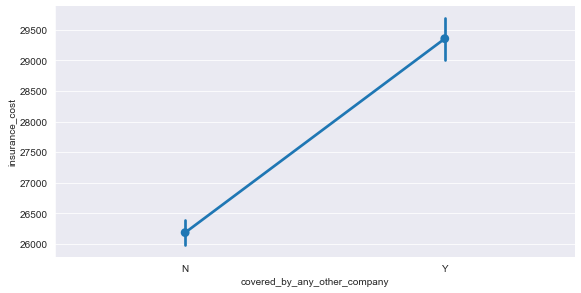

In [139]:
print(sns.factorplot(x='covered_by_any_other_company',y='insurance_cost',data=df, size = 4, aspect = 2))
df.groupby('covered_by_any_other_company')['insurance_cost'].agg(['mean','median','size'])

* Insurance cost is higher for insurer who hold more than one insurance

#### Analyzing Insurance cost vs adventure_sports

,mean,median,size
adventure_sports,,,
0,26828.816657,27148,22957
1,30727.385218,30850,2043


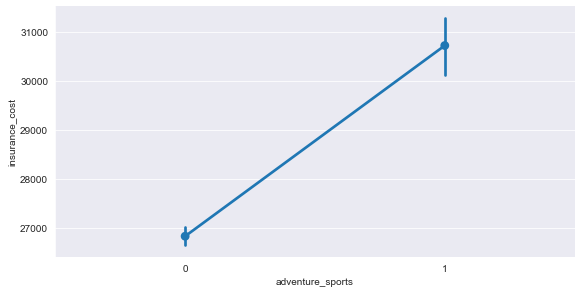

In [140]:
print(sns.factorplot(x='adventure_sports',y='insurance_cost',data=df, size = 4, aspect = 2))
df.groupby('adventure_sports')['insurance_cost'].agg(['mean','median','size'])

* Insurance cost is higher for customer who take part in  adventure sports

#### Analyzing Insurance cost vs heart_decs_history

,mean,median,size
heart_decs_history,,,
0,27148.939832,27148,23634
1,27120.898975,27148,1366


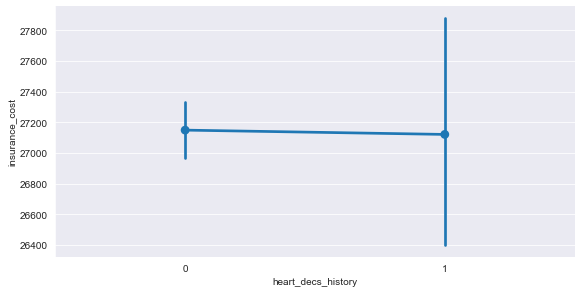

In [141]:
print(sns.factorplot(x='heart_decs_history',y='insurance_cost',data=df, size = 4, aspect = 2))
df.groupby('heart_decs_history')['insurance_cost'].agg(['mean','median','size'])

<AxesSubplot:xlabel='heart_decs_history', ylabel='insurance_cost'>

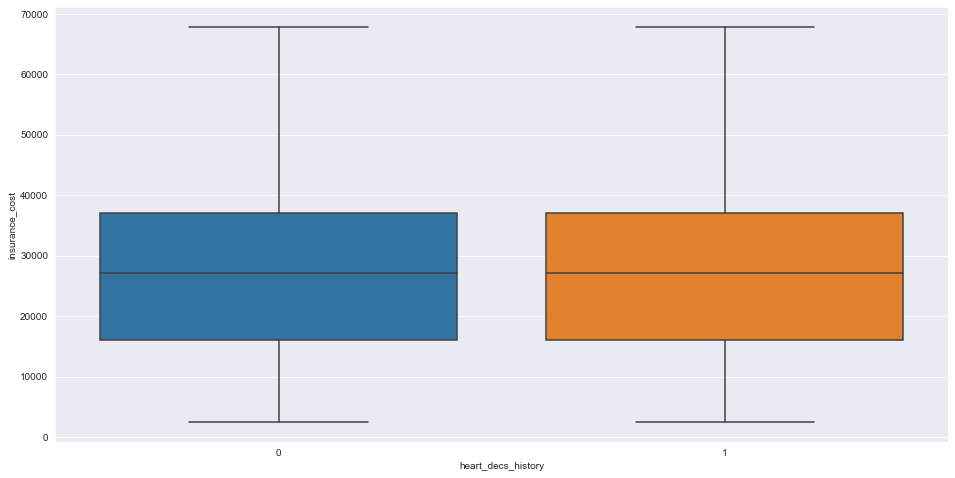

In [142]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
sns.boxplot(x='heart_decs_history', y='insurance_cost', data=df)

* There is no marginal differance in the insurance cost for customer having or not having heart dec history.

#### Analyzing Insurance cost vs other_major_decs_history

,mean,median,size
other_major_decs_history,,,
0,27158.125521,27148,22546
1,27048.938060,27148,2454


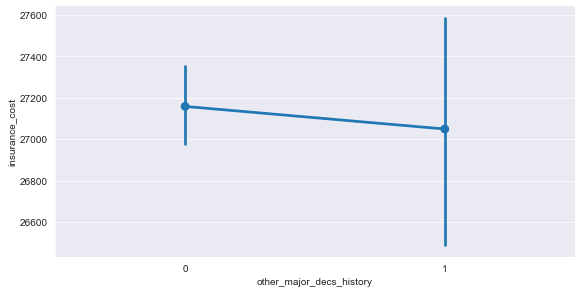

In [143]:
print(sns.factorplot(x='other_major_decs_history',y='insurance_cost',data=df, size = 4, aspect = 2))
df.groupby('other_major_decs_history')['insurance_cost'].agg(['mean','median','size'])

* This is bit surpricing that customer having other disease history have average insurance cost lower than do not have disease history

In [144]:
#let's make the copy of the dataframe, before making any furhter changes
df_bcp=df.copy()

In [145]:
df_bcp

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,admitted_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,0,Male,97,31.2,Unknown,No,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,0,Male,212,34.2,formerly smoked,No,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,0,Female,166,40.4,formerly smoked,No,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,0,Female,109,22.9,Unknown,No,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,1,Male,118,26.5,never smoked,Yes,Bangalore,74,N,No,Extreme,0,34,29616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,29995,3,0,0,Salried,4,225 to 250,5614,22,0,0,Male,145,36.1,smokes,Yes,Kanpur,79,Y,Rare,Moderate,4,40,39488
24996,29996,6,0,0,Business,4,200 to 225,4719,58,0,0,Male,134,31.3,never smoked,Yes,Kanpur,66,N,Rare,Moderate,2,28,14808
24997,29997,7,0,1,Student,2,150 to 175,5624,34,0,1,Male,151,32.1,Unknown,No,Bhubaneswar,76,N,Rare,Moderate,1,35,33318
24998,29998,1,0,0,Salried,2,225 to 250,10777,27,0,0,Male,66,26.6,Unknown,No,Surat,74,N,Rare,Moderate,0,40,30850


# Data Processing

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   applicant_id                    25000 non-null  int64  
 1   years_of_insurance_with_us      25000 non-null  int64  
 2   regular_checkup_lasy_year       25000 non-null  int64  
 3   adventure_sports                25000 non-null  object 
 4   Occupation                      25000 non-null  object 
 5   visited_doctor_last_1_year      25000 non-null  int64  
 6   cholesterol_level               25000 non-null  object 
 7   daily_avg_steps                 25000 non-null  int64  
 8   age                             25000 non-null  int64  
 9   heart_decs_history              25000 non-null  object 
 10  other_major_decs_history        25000 non-null  object 
 11  Gender                          25000 non-null  object 
 12  avg_glucose_level               

### Treating Outlilers 
from EDA we have seen there are outliers present for columns bmi and daily_avg_steps

In [147]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

#### Treating outliers for column - bmi

In [148]:
lowerbound,upperbound = outlier_treatment(df.bmi)
print(lowerbound,upperbound)

12.550000000000002 48.949999999999996


In [149]:
df_ob=df[(df.bmi >upperbound) | (df.bmi < lowerbound)]
df_ob

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,admitted_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
167,5167,3,0,0,Business,4,200 to 225,4188,32,0,0,Male,156,50.3,never smoked,Yes,Kolkata,62,Y,No,Moderate,5,22,18510
234,5234,8,2,0,Student,4,150 to 175,4804,57,0,0,Male,141,49.6,Unknown,Yes,Guwahati,72,Y,Rare,No,0,35,27148
251,5251,2,0,0,Business,3,175 to 200,8081,37,0,0,Female,80,52.3,never smoked,No,Chennai,94,Y,Rare,Extreme,1,37,60466
266,5266,4,0,0,Student,4,125 to 150,5175,32,0,0,Male,188,63.6,smokes,Yes,Guwahati,54,N,Rare,Moderate,6,33,7404
282,5282,2,1,0,Student,2,125 to 150,5247,61,0,0,Female,153,50.5,never smoked,No,Nagpur,69,N,No,No,1,33,22212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24770,29770,5,1,0,Student,3,150 to 175,7296,29,0,0,Male,221,64.2,Unknown,Yes,Ahmedabad,64,N,Rare,Extreme,3,27,18510
24780,29780,6,0,1,Business,3,175 to 200,4416,66,0,0,Male,232,58.1,formerly smoked,Yes,Delhi,73,N,No,Moderate,0,29,29616
24902,29902,0,0,0,Business,2,200 to 225,5357,67,0,1,Male,145,95.0,never smoked,No,Bangalore,53,N,No,Moderate,6,22,3702
24937,29937,7,0,0,Student,2,150 to 175,4459,73,0,0,Male,240,53.2,never smoked,Yes,Bangalore,67,N,No,Moderate,0,27,19744


In [150]:
df_ob.describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,611.0,17724.682488,7225.631926,5167.0,11601.50,17576.0,23943.5,29941.0
years_of_insurance_with_us,611.0,4.042553,2.708485,0.0,1.00,4.0,7.0,8.0
regular_checkup_lasy_year,611.0,0.677578,1.099540,0.0,0.00,0.0,1.0,5.0
visited_doctor_last_1_year,611.0,3.129296,1.194788,1.0,2.00,3.0,4.0,9.0
daily_avg_steps,611.0,5213.456628,1051.435665,2400.0,4600.00,5096.0,5702.5,9481.0
age,611.0,43.648118,15.608601,17.0,30.00,43.0,57.5,73.0
avg_glucose_level,611.0,166.160393,64.157418,58.0,111.00,163.0,223.5,276.0
bmi,611.0,55.794926,7.871908,12.3,51.35,54.0,57.9,100.6
weight,611.0,71.381342,9.409983,52.0,64.00,71.0,79.0,96.0
weight_change_in_last_one_year,611.0,2.651391,1.736185,0.0,1.00,3.0,4.0,6.0


* This might be the high insurance cost customer , so we have to keep this customer by simply treating the oulier not dropping it.

 We got 589 records which are oulier 

In [151]:
# Treating outlier for bmi
df['bmi']=np.where(df['bmi']>upperbound,upperbound,df['bmi'])
df['bmi']=np.where(df['bmi']<lowerbound,lowerbound,df['bmi'])

In [152]:
# for column in df[colmn].columns:
#     lr,ur=remove_outlier(df[column])
#     df[column]=np.where(df[column]>ur,ur,df[column])
#     df[column]=np.where(df[column]<lr,lr,df[column])

In [153]:
df.shape

(25000, 24)

Skewness is : 0.44627433237108494


count    25000.000000
mean        31.190458
std          7.162813
min         12.550000
25%         26.200000
50%         30.700000
75%         35.300000
max         48.950000
Name: bmi, dtype: float64

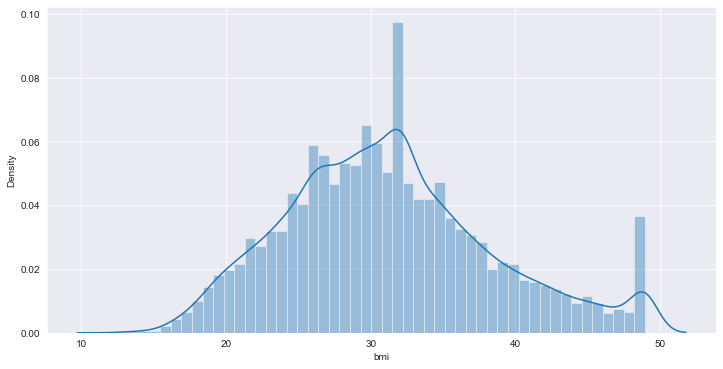

In [154]:
print("Skewness is :", df.bmi.skew())
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.distplot(df.bmi)
df.bmi.describe()

* After treating outliers of bmi  data is nicely distributed

#### Treating outliers for column - daily_avg_steps

In [155]:
lowerbound,upperbound = outlier_treatment(df.daily_avg_steps)
print(lowerbound,upperbound)

2762.5 7510.5


In [156]:
df[(df.daily_avg_steps >upperbound) | (df.daily_avg_steps < lowerbound)]

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,admitted_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
28,5028,3,1,0,Salried,1,125 to 150,7887,65,0,1,Female,157,23.2,formerly smoked,No,Kolkata,52,N,Rare,Moderate,6,18,3702
59,5059,8,0,1,Student,2,150 to 175,7547,65,0,0,Male,225,35.8,formerly smoked,Yes,Jaipur,74,N,Rare,Moderate,0,27,34552
76,5076,0,1,0,Student,1,125 to 150,9110,59,0,0,Male,100,40.5,smokes,No,Lucknow,66,N,Rare,Extreme,0,39,22212
170,5170,4,3,0,Salried,3,125 to 150,8987,65,1,0,Male,193,32.1,smokes,Yes,Kolkata,62,Y,Rare,No,1,25,8638
173,5173,7,1,0,Student,3,125 to 150,8400,35,0,0,Male,103,25.2,Unknown,Yes,Ahmedabad,66,N,No,Extreme,5,38,19744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24931,29931,5,0,0,Student,4,125 to 150,8085,62,0,0,Male,122,25.9,Unknown,Yes,Nagpur,62,N,No,Extreme,3,16,6170
24964,29964,1,0,0,Business,2,150 to 175,7951,50,0,0,Male,70,32.4,never smoked,No,Mangalore,62,N,No,Moderate,5,21,8638
24987,29987,4,0,0,Student,4,125 to 150,7994,19,0,1,Male,187,42.0,Unknown,Yes,Lucknow,64,Y,No,Moderate,0,33,18510
24988,29988,8,1,1,Salried,2,225 to 250,8136,64,0,0,Male,206,38.4,smokes,Yes,Lucknow,76,N,Rare,No,3,13,34552


data have 921 records as outliers, lets treat these outlier point 

In [157]:
# Treating outlier for bmi
df['daily_avg_steps']=np.where(df['daily_avg_steps']>upperbound,upperbound,df['daily_avg_steps'])
df['daily_avg_steps']=np.where(df['daily_avg_steps']<lowerbound,lowerbound,df['daily_avg_steps'])

In [158]:
df.shape

(25000, 24)

Skewness is : 0.435063009109378


count    25000.000000
mean      5189.022720
std        969.591482
min       2762.500000
25%       4543.000000
50%       5089.000000
75%       5730.000000
max       7510.500000
Name: daily_avg_steps, dtype: float64

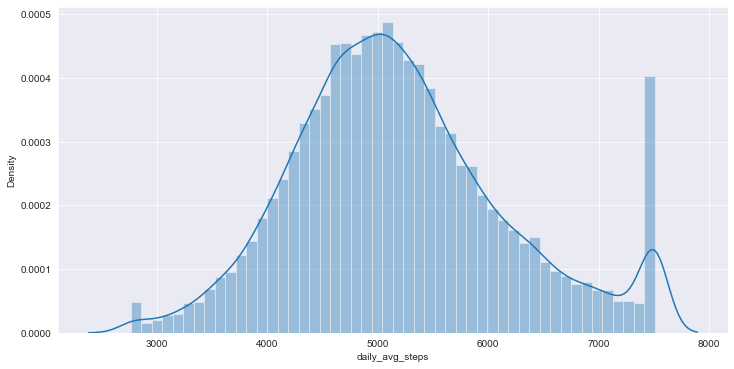

In [159]:
print("Skewness is :", df.daily_avg_steps.skew())
plt.figure(figsize=(plotSizeX, plotSizeY))
sns.distplot(df.daily_avg_steps)
df.daily_avg_steps.describe()

After treating outliers of daily_avg_steps,data is nicely distributed.

In [160]:
#Let's create another dataframe for modeling
df_model=df.copy()

In [161]:
#let's check the new copy of dataframe by printing first few records
df_model.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,admitted_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866.0,28,1,0,Male,97,31.2,Unknown,No,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411.0,50,0,0,Male,212,34.2,formerly smoked,No,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509.0,68,0,0,Female,166,40.4,formerly smoked,No,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214.0,51,0,0,Female,109,22.9,Unknown,No,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938.0,44,0,1,Male,118,26.5,never smoked,Yes,Bangalore,74,N,No,Extreme,0,34,29616


In [162]:
#let's verify the columns
df_model.columns

Index(['applicant_id', 'years_of_insurance_with_us',
       'regular_checkup_lasy_year', 'adventure_sports', 'Occupation',
       'visited_doctor_last_1_year', 'cholesterol_level', 'daily_avg_steps',
       'age', 'heart_decs_history', 'other_major_decs_history', 'Gender',
       'avg_glucose_level', 'bmi', 'smoking_status', 'admitted_status',
       'Location', 'weight', 'covered_by_any_other_company', 'Alcohol',
       'exercise', 'weight_change_in_last_one_year', 'fat_percentage',
       'insurance_cost'],
      dtype='object')

In [163]:
#Dropping the feature not required in 1st Iteration
df_final=df_model.drop(['applicant_id'],axis=1)

In [164]:
df_final.shape

(25000, 23)

In [165]:
df_final.head()

,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,other_major_decs_history,Gender,avg_glucose_level,bmi,smoking_status,admitted_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3,1,1,Salried,2,125 to 150,4866.0,28,1,0,Male,97,31.2,Unknown,No,Chennai,67,N,Rare,Moderate,1,25,20978
1,0,0,0,Student,4,150 to 175,6411.0,50,0,0,Male,212,34.2,formerly smoked,No,Jaipur,58,N,Rare,Moderate,3,27,6170
2,1,0,0,Business,4,200 to 225,4509.0,68,0,0,Female,166,40.4,formerly smoked,No,Jaipur,73,N,Daily,Extreme,0,32,28382
3,7,4,0,Business,2,175 to 200,6214.0,51,0,0,Female,109,22.9,Unknown,No,Chennai,71,Y,Rare,No,3,37,27148
4,3,1,0,Student,2,150 to 175,4938.0,44,0,1,Male,118,26.5,never smoked,Yes,Bangalore,74,N,No,Extreme,0,34,29616


In [166]:
df_final.columns

Index(['years_of_insurance_with_us', 'regular_checkup_lasy_year',
       'adventure_sports', 'Occupation', 'visited_doctor_last_1_year',
       'cholesterol_level', 'daily_avg_steps', 'age', 'heart_decs_history',
       'other_major_decs_history', 'Gender', 'avg_glucose_level', 'bmi',
       'smoking_status', 'admitted_status', 'Location', 'weight',
       'covered_by_any_other_company', 'Alcohol', 'exercise',
       'weight_change_in_last_one_year', 'fat_percentage', 'insurance_cost'],
      dtype='object')

##### Creating dummies for categorical variables: 
* 'adventure_sports', 'Occupation', 'cholesterol_level','heart_decs_history', 'other_major_decs_history', 'Gender','smoking_status','Location','covered_by_any_other_company','Alcohol','exercise',
* 'visited_doctor_last_1_year','regular_checkup_lasy_year','years_of_insurance_with_us',admitted_status

In [167]:
# Getting dummies for columns ceil, coast, sight, condition, quality, yr_renovated, furnished
dff = pd.get_dummies(df_final, columns=['adventure_sports', 'Occupation', 'cholesterol_level','heart_decs_history',
                                        'other_major_decs_history', 'Gender','smoking_status', 'Location', 
                                        'covered_by_any_other_company','Alcohol','exercise','years_of_insurance_with_us',
                                        'visited_doctor_last_1_year','regular_checkup_lasy_year','admitted_status'],drop_first=True)

In [168]:
dff.shape

(25000, 65)

In [169]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   daily_avg_steps                 25000 non-null  float64
 1   age                             25000 non-null  int64  
 2   avg_glucose_level               25000 non-null  int64  
 3   bmi                             25000 non-null  float64
 4   weight                          25000 non-null  int64  
 5   weight_change_in_last_one_year  25000 non-null  int64  
 6   fat_percentage                  25000 non-null  int64  
 7   insurance_cost                  25000 non-null  int64  
 8   adventure_sports_1              25000 non-null  uint8  
 9   Occupation_Salried              25000 non-null  uint8  
 10  Occupation_Student              25000 non-null  uint8  
 11  cholesterol_level_150 to 175    25000 non-null  uint8  
 12  cholesterol_level_175 to 200    

In [170]:
# Renaming the columns
dff.rename(columns={'cholesterol_level_150 to 175':'cholesterol_level_150_to_175','cholesterol_level_175 to 200':'cholesterol_level_175_to_200',
'cholesterol_level_200 to 225':'cholesterol_level_200_to_225','cholesterol_level_225 to 250':'cholesterol_level_225_to_250',
'smoking_status_formerly smoked':'smoking_status_formerly_smoked','smoking_status_never smoked':'smoking_status_never_smoked',
'regular_checkup_lasy_year_1':'regular_checkup_last_year_1','regular_checkup_lasy_year_2':'regular_checkup_last_year_2',
'regular_checkup_lasy_year_3':'regular_checkup_last_year_3','regular_checkup_lasy_year_4':'regular_checkup_last_year_4',
 'regular_checkup_lasy_year_5':'regular_checkup_last_year_5'},inplace= True)

In [171]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 65 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   daily_avg_steps                 25000 non-null  float64
 1   age                             25000 non-null  int64  
 2   avg_glucose_level               25000 non-null  int64  
 3   bmi                             25000 non-null  float64
 4   weight                          25000 non-null  int64  
 5   weight_change_in_last_one_year  25000 non-null  int64  
 6   fat_percentage                  25000 non-null  int64  
 7   insurance_cost                  25000 non-null  int64  
 8   adventure_sports_1              25000 non-null  uint8  
 9   Occupation_Salried              25000 non-null  uint8  
 10  Occupation_Student              25000 non-null  uint8  
 11  cholesterol_level_150_to_175    25000 non-null  uint8  
 12  cholesterol_level_175_to_200    

In [172]:
for i in dff.columns:
    print (i ,'+',end=" ")

daily_avg_steps + age + avg_glucose_level + bmi + weight + weight_change_in_last_one_year + fat_percentage + insurance_cost + adventure_sports_1 + Occupation_Salried + Occupation_Student + cholesterol_level_150_to_175 + cholesterol_level_175_to_200 + cholesterol_level_200_to_225 + cholesterol_level_225_to_250 + heart_decs_history_1 + other_major_decs_history_1 + Gender_Male + smoking_status_formerly_smoked + smoking_status_never_smoked + smoking_status_smokes + Location_Bangalore + Location_Bhubaneswar + Location_Chennai + Location_Delhi + Location_Guwahati + Location_Jaipur + Location_Kanpur + Location_Kolkata + Location_Lucknow + Location_Mangalore + Location_Mumbai + Location_Nagpur + Location_Pune + Location_Surat + covered_by_any_other_company_Y + Alcohol_No + Alcohol_Rare + exercise_Moderate + exercise_No + years_of_insurance_with_us_1 + years_of_insurance_with_us_2 + years_of_insurance_with_us_3 + years_of_insurance_with_us_4 + years_of_insurance_with_us_5 + years_of_insurance_w

In [173]:
pd.options.display.max_rows = None

In [174]:
# Correlation with the insurance cost variable
dff.corrwith(dff.insurance_cost)

daily_avg_steps                  -0.007220
age                               0.005195
avg_glucose_level                -0.005007
bmi                              -0.008504
weight                            0.970357
weight_change_in_last_one_year   -0.342710
fat_percentage                   -0.008486
insurance_cost                    1.000000
adventure_sports_1                0.074561
Occupation_Salried               -0.008547
Occupation_Student               -0.000127
cholesterol_level_150_to_175     -0.000511
cholesterol_level_175_to_200     -0.004172
cholesterol_level_200_to_225      0.011615
cholesterol_level_225_to_250     -0.009261
heart_decs_history_1             -0.000445
other_major_decs_history_1       -0.002268
Gender_Male                      -0.002149
smoking_status_formerly_smoked   -0.003041
smoking_status_never_smoked      -0.003587
smoking_status_smokes            -0.003470
Location_Bangalore               -0.007988
Location_Bhubaneswar              0.006438
Location_Ch

 ## Model Building

In [175]:
# Split the data into training and test set in 70:30 ratio

from sklearn.model_selection import train_test_split

Train, Test = train_test_split(dff, test_size=0.30 , random_state=1)

In [176]:
from IPython.display import display

In [177]:
display(Train.head())
print(Train.shape)

,daily_avg_steps,age,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost,adventure_sports_1,Occupation_Salried,Occupation_Student,cholesterol_level_150_to_175,cholesterol_level_175_to_200,cholesterol_level_200_to_225,cholesterol_level_225_to_250,heart_decs_history_1,other_major_decs_history_1,Gender_Male,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,Location_Bangalore,Location_Bhubaneswar,Location_Chennai,Location_Delhi,Location_Guwahati,Location_Jaipur,Location_Kanpur,Location_Kolkata,Location_Lucknow,Location_Mangalore,Location_Mumbai,Location_Nagpur,Location_Pune,Location_Surat,covered_by_any_other_company_Y,Alcohol_No,Alcohol_Rare,exercise_Moderate,exercise_No,years_of_insurance_with_us_1,years_of_insurance_with_us_2,years_of_insurance_with_us_3,years_of_insurance_with_us_4,years_of_insurance_with_us_5,years_of_insurance_with_us_6,years_of_insurance_with_us_7,years_of_insurance_with_us_8,visited_doctor_last_1_year_1,visited_doctor_last_1_year_2,visited_doctor_last_1_year_3,visited_doctor_last_1_year_4,visited_doctor_last_1_year_5,visited_doctor_last_1_year_6,visited_doctor_last_1_year_7,visited_doctor_last_1_year_8,visited_doctor_last_1_year_9,visited_doctor_last_1_year_10,visited_doctor_last_1_year_12,regular_checkup_last_year_1,regular_checkup_last_year_2,regular_checkup_last_year_3,regular_checkup_last_year_4,regular_checkup_last_year_5,admitted_status_Yes
4289,5245.0,45,130,35.4,74,1,24,28382,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
19621,7510.5,60,251,31.1,67,3,40,23446,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14965,5828.0,41,67,32.1,83,4,21,46892,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
12321,4463.0,55,263,32.7,84,4,12,40722,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6269,7510.5,25,147,37.9,79,0,36,32084,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1


(17500, 65)


In [178]:
display(Test.head())
print(Test.shape)

,daily_avg_steps,age,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost,adventure_sports_1,Occupation_Salried,Occupation_Student,cholesterol_level_150_to_175,cholesterol_level_175_to_200,cholesterol_level_200_to_225,cholesterol_level_225_to_250,heart_decs_history_1,other_major_decs_history_1,Gender_Male,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,Location_Bangalore,Location_Bhubaneswar,Location_Chennai,Location_Delhi,Location_Guwahati,Location_Jaipur,Location_Kanpur,Location_Kolkata,Location_Lucknow,Location_Mangalore,Location_Mumbai,Location_Nagpur,Location_Pune,Location_Surat,covered_by_any_other_company_Y,Alcohol_No,Alcohol_Rare,exercise_Moderate,exercise_No,years_of_insurance_with_us_1,years_of_insurance_with_us_2,years_of_insurance_with_us_3,years_of_insurance_with_us_4,years_of_insurance_with_us_5,years_of_insurance_with_us_6,years_of_insurance_with_us_7,years_of_insurance_with_us_8,visited_doctor_last_1_year_1,visited_doctor_last_1_year_2,visited_doctor_last_1_year_3,visited_doctor_last_1_year_4,visited_doctor_last_1_year_5,visited_doctor_last_1_year_6,visited_doctor_last_1_year_7,visited_doctor_last_1_year_8,visited_doctor_last_1_year_9,visited_doctor_last_1_year_10,visited_doctor_last_1_year_12,regular_checkup_last_year_1,regular_checkup_last_year_2,regular_checkup_last_year_3,regular_checkup_last_year_4,regular_checkup_last_year_5,admitted_status_Yes
21492,3099.0,32,153,35.6,80,1,33,39488,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9488,5119.0,26,146,34.9,61,5,35,6170,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
16933,4649.0,60,263,29.1,58,3,29,9872,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12604,5837.0,55,132,26.8,70,2,29,28382,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
8222,4453.0,37,219,28.0,78,0,24,34552,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


(7500, 65)


### OLS Regression models

In [179]:
import statsmodels.formula.api as SM

In [180]:
formula_1='insurance_cost ~ daily_avg_steps + age + avg_glucose_level + bmi + weight + weight_change_in_last_one_year + fat_percentage + admitted_status_Yes + adventure_sports_1 + Occupation_Salried + Occupation_Student + cholesterol_level_150_to_175 + cholesterol_level_175_to_200 + cholesterol_level_200_to_225 + cholesterol_level_225_to_250 + heart_decs_history_1 + other_major_decs_history_1 + Gender_Male + smoking_status_formerly_smoked + smoking_status_never_smoked + smoking_status_smokes + Location_Bangalore + Location_Bhubaneswar + Location_Chennai + Location_Delhi + Location_Guwahati + Location_Jaipur + Location_Kanpur + Location_Kolkata + Location_Lucknow + Location_Mangalore + Location_Mumbai + Location_Nagpur + Location_Pune + Location_Surat + covered_by_any_other_company_Y + Alcohol_No + Alcohol_Rare + exercise_Moderate + exercise_No + years_of_insurance_with_us_1 + years_of_insurance_with_us_2 + years_of_insurance_with_us_3 + years_of_insurance_with_us_4 + years_of_insurance_with_us_5 + years_of_insurance_with_us_6 + years_of_insurance_with_us_7 + years_of_insurance_with_us_8 + visited_doctor_last_1_year_1 + visited_doctor_last_1_year_2 + visited_doctor_last_1_year_3 + visited_doctor_last_1_year_4 + visited_doctor_last_1_year_5 + visited_doctor_last_1_year_6 + visited_doctor_last_1_year_7 + visited_doctor_last_1_year_8 + visited_doctor_last_1_year_9 + visited_doctor_last_1_year_10 + visited_doctor_last_1_year_12 + regular_checkup_last_year_1 + regular_checkup_last_year_2 + regular_checkup_last_year_3 + regular_checkup_last_year_4 + regular_checkup_last_year_5'
lm1 = SM.ols(formula=formula_1, data=Train).fit() 
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     4705.
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        09:06:59   Log-Likelihood:            -1.6694e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17435   BIC:                         3.345e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [181]:
# VIF score check function
def vif_cal(input_data):
    '''
    input_data: Dataframe of features
    '''
    c_vars = input_data
    cvar_names = input_data.columns
    for i in range(len(cvar_names)):
        d = c_vars[cvar_names[i]] 
        c = c_vars[cvar_names.drop(cvar_names[i])]
        rsq = SM.ols(formula="d~c", data=c_vars).fit().rsquared  
        vif = round(1/(1-rsq), 2)
        print (cvar_names[i], " VIF = " , vif)

In [182]:
vif_cal(input_data=Train.drop('insurance_cost',axis=1))

daily_avg_steps  VIF =  1.07
age  VIF =  1.0
avg_glucose_level  VIF =  1.0
bmi  VIF =  1.21
weight  VIF =  1.23
weight_change_in_last_one_year  VIF =  1.18
fat_percentage  VIF =  1.26
adventure_sports_1  VIF =  1.01
Occupation_Salried  VIF =  4.61
Occupation_Student  VIF =  2.91
cholesterol_level_150_to_175  VIF =  2.36
cholesterol_level_175_to_200  VIF =  2.65
cholesterol_level_200_to_225  VIF =  2.71
cholesterol_level_225_to_250  VIF =  1.73
heart_decs_history_1  VIF =  1.03
other_major_decs_history_1  VIF =  1.06
Gender_Male  VIF =  1.27
smoking_status_formerly_smoked  VIF =  1.47
smoking_status_never_smoked  VIF =  1.57
smoking_status_smokes  VIF =  1.4
Location_Bangalore  VIF =  1.91
Location_Bhubaneswar  VIF =  1.91
Location_Chennai  VIF =  1.89
Location_Delhi  VIF =  1.87
Location_Guwahati  VIF =  1.88
Location_Jaipur  VIF =  1.88
Location_Kanpur  VIF =  1.86
Location_Kolkata  VIF =  1.84
Location_Lucknow  VIF =  1.86
Location_Mangalore  VIF =  1.86
Location_Mumbai  VIF =  1.85


In [183]:
vif_cal(input_data=Train.drop(['insurance_cost','visited_doctor_last_1_year_2'],axis=1))

daily_avg_steps  VIF =  1.07
age  VIF =  1.0
avg_glucose_level  VIF =  1.0
bmi  VIF =  1.21
weight  VIF =  1.23
weight_change_in_last_one_year  VIF =  1.18
fat_percentage  VIF =  1.26
adventure_sports_1  VIF =  1.01
Occupation_Salried  VIF =  4.61
Occupation_Student  VIF =  2.91
cholesterol_level_150_to_175  VIF =  2.36
cholesterol_level_175_to_200  VIF =  2.65
cholesterol_level_200_to_225  VIF =  2.71
cholesterol_level_225_to_250  VIF =  1.73
heart_decs_history_1  VIF =  1.03
other_major_decs_history_1  VIF =  1.06
Gender_Male  VIF =  1.27
smoking_status_formerly_smoked  VIF =  1.47
smoking_status_never_smoked  VIF =  1.57
smoking_status_smokes  VIF =  1.4
Location_Bangalore  VIF =  1.91
Location_Bhubaneswar  VIF =  1.91
Location_Chennai  VIF =  1.89
Location_Delhi  VIF =  1.87
Location_Guwahati  VIF =  1.88
Location_Jaipur  VIF =  1.88
Location_Kanpur  VIF =  1.86
Location_Kolkata  VIF =  1.84
Location_Lucknow  VIF =  1.86
Location_Mangalore  VIF =  1.86
Location_Mumbai  VIF =  1.85


* Taking the VIF 2 as threshold 
* base on this drop one by one feature which is having VIF greater than 2

In [184]:
vif_cal(input_data=Train.drop(['insurance_cost','visited_doctor_last_1_year_2','Occupation_Salried'],axis=1))

daily_avg_steps  VIF =  1.07
age  VIF =  1.0
avg_glucose_level  VIF =  1.0
bmi  VIF =  1.21
weight  VIF =  1.23
weight_change_in_last_one_year  VIF =  1.18
fat_percentage  VIF =  1.06
adventure_sports_1  VIF =  1.01
Occupation_Student  VIF =  1.54
cholesterol_level_150_to_175  VIF =  1.39
cholesterol_level_175_to_200  VIF =  1.65
cholesterol_level_200_to_225  VIF =  1.51
cholesterol_level_225_to_250  VIF =  1.37
heart_decs_history_1  VIF =  1.03
other_major_decs_history_1  VIF =  1.05
Gender_Male  VIF =  1.27
smoking_status_formerly_smoked  VIF =  1.47
smoking_status_never_smoked  VIF =  1.57
smoking_status_smokes  VIF =  1.4
Location_Bangalore  VIF =  1.91
Location_Bhubaneswar  VIF =  1.91
Location_Chennai  VIF =  1.89
Location_Delhi  VIF =  1.87
Location_Guwahati  VIF =  1.88
Location_Jaipur  VIF =  1.88
Location_Kanpur  VIF =  1.86
Location_Kolkata  VIF =  1.84
Location_Lucknow  VIF =  1.86
Location_Mangalore  VIF =  1.86
Location_Mumbai  VIF =  1.85
Location_Nagpur  VIF =  1.88
Loc

In [185]:
vif_cal(input_data=Train.drop(['insurance_cost','visited_doctor_last_1_year_2','Occupation_Salried','years_of_insurance_with_us_3'],axis=1))

daily_avg_steps  VIF =  1.07
age  VIF =  1.0
avg_glucose_level  VIF =  1.0
bmi  VIF =  1.21
weight  VIF =  1.23
weight_change_in_last_one_year  VIF =  1.18
fat_percentage  VIF =  1.06
adventure_sports_1  VIF =  1.01
Occupation_Student  VIF =  1.54
cholesterol_level_150_to_175  VIF =  1.39
cholesterol_level_175_to_200  VIF =  1.65
cholesterol_level_200_to_225  VIF =  1.51
cholesterol_level_225_to_250  VIF =  1.37
heart_decs_history_1  VIF =  1.03
other_major_decs_history_1  VIF =  1.05
Gender_Male  VIF =  1.27
smoking_status_formerly_smoked  VIF =  1.47
smoking_status_never_smoked  VIF =  1.57
smoking_status_smokes  VIF =  1.4
Location_Bangalore  VIF =  1.91
Location_Bhubaneswar  VIF =  1.91
Location_Chennai  VIF =  1.89
Location_Delhi  VIF =  1.87
Location_Guwahati  VIF =  1.88
Location_Jaipur  VIF =  1.88
Location_Kanpur  VIF =  1.86
Location_Kolkata  VIF =  1.84
Location_Lucknow  VIF =  1.86
Location_Mangalore  VIF =  1.86
Location_Mumbai  VIF =  1.85
Location_Nagpur  VIF =  1.88
Loc

In [186]:
vif_cal(input_data=Train.drop(['insurance_cost','visited_doctor_last_1_year_2','Occupation_Salried','Alcohol_No','years_of_insurance_with_us_3'],axis=1))

daily_avg_steps  VIF =  1.07
age  VIF =  1.0
avg_glucose_level  VIF =  1.0
bmi  VIF =  1.21
weight  VIF =  1.23
weight_change_in_last_one_year  VIF =  1.18
fat_percentage  VIF =  1.06
adventure_sports_1  VIF =  1.01
Occupation_Student  VIF =  1.53
cholesterol_level_150_to_175  VIF =  1.38
cholesterol_level_175_to_200  VIF =  1.61
cholesterol_level_200_to_225  VIF =  1.51
cholesterol_level_225_to_250  VIF =  1.37
heart_decs_history_1  VIF =  1.03
other_major_decs_history_1  VIF =  1.05
Gender_Male  VIF =  1.27
smoking_status_formerly_smoked  VIF =  1.47
smoking_status_never_smoked  VIF =  1.57
smoking_status_smokes  VIF =  1.4
Location_Bangalore  VIF =  1.91
Location_Bhubaneswar  VIF =  1.91
Location_Chennai  VIF =  1.89
Location_Delhi  VIF =  1.87
Location_Guwahati  VIF =  1.88
Location_Jaipur  VIF =  1.88
Location_Kanpur  VIF =  1.86
Location_Kolkata  VIF =  1.84
Location_Lucknow  VIF =  1.86
Location_Mangalore  VIF =  1.86
Location_Mumbai  VIF =  1.85
Location_Nagpur  VIF =  1.88
Loc

All VIF values are below the threshould 2 so we can say that this model are multicoliniearity free

In [187]:
# Model without 'visited_doctor_last_1_year_2','years_of_insurance_with_us_3','Alcohol_No' and 'Occupation_Salried' variable

formula_2='insurance_cost ~ daily_avg_steps + age + avg_glucose_level + bmi + weight + weight_change_in_last_one_year + fat_percentage + admitted_status_Yes + adventure_sports_1 + Occupation_Student + cholesterol_level_150_to_175 + cholesterol_level_175_to_200 + cholesterol_level_200_to_225 + cholesterol_level_225_to_250 + heart_decs_history_1 + other_major_decs_history_1 + Gender_Male + smoking_status_formerly_smoked + smoking_status_never_smoked + smoking_status_smokes + Location_Bangalore + Location_Bhubaneswar + Location_Chennai + Location_Delhi + Location_Guwahati + Location_Jaipur + Location_Kanpur + Location_Kolkata + Location_Lucknow + Location_Mangalore + Location_Mumbai + Location_Nagpur + Location_Pune + Location_Surat + covered_by_any_other_company_Y + Alcohol_Rare + exercise_Moderate + exercise_No + years_of_insurance_with_us_1 + years_of_insurance_with_us_2 + years_of_insurance_with_us_4 + years_of_insurance_with_us_5 + years_of_insurance_with_us_6 + years_of_insurance_with_us_7 + years_of_insurance_with_us_8 + visited_doctor_last_1_year_1 + visited_doctor_last_1_year_3 + visited_doctor_last_1_year_4 + visited_doctor_last_1_year_5 + visited_doctor_last_1_year_6 + visited_doctor_last_1_year_7 + visited_doctor_last_1_year_8 + visited_doctor_last_1_year_9 + visited_doctor_last_1_year_10 + visited_doctor_last_1_year_12 + regular_checkup_last_year_1 + regular_checkup_last_year_2 + regular_checkup_last_year_3 + regular_checkup_last_year_4 + regular_checkup_last_year_5'
lm2 = SM.ols(formula=formula_2, data=Train).fit() 
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     5012.
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        09:07:42   Log-Likelihood:            -1.6695e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17439   BIC:                         3.345e+05
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [188]:
# we can drop variable base on significance level p value 

In [189]:
# Model without 'visited_doctor_last_1_year_2','years_of_insurance_with_us_3','Alcohol_No' and 'Occupation_Salried' variable

formula_3='insurance_cost ~  age + weight + weight_change_in_last_one_year + admitted_status_Yes+ covered_by_any_other_company_Y  + years_of_insurance_with_us_1 + years_of_insurance_with_us_2 + years_of_insurance_with_us_4 +years_of_insurance_with_us_5 +years_of_insurance_with_us_6 + years_of_insurance_with_us_7 + years_of_insurance_with_us_8 + regular_checkup_last_year_1 + regular_checkup_last_year_2 + regular_checkup_last_year_3 + regular_checkup_last_year_4 + regular_checkup_last_year_5'
lm3 = SM.ols(formula=formula_3, data=Train).fit() 
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                 1.769e+04
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        09:07:42   Log-Likelihood:            -1.6697e+05
No. Observations:               17500   AIC:                         3.340e+05
Df Residuals:                   17482   BIC:                         3.341e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [190]:
formula_4='insurance_cost ~ weight'
lm4 = SM.ols(formula=formula_4, data=Train).fit() 
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:         insurance_cost   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 2.807e+05
Date:                Thu, 19 May 2022   Prob (F-statistic):               0.00
Time:                        09:07:42   Log-Likelihood:            -1.6754e+05
No. Observations:               17500   AIC:                         3.351e+05
Df Residuals:                   17498   BIC:                         3.351e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.958e+04    203.193   -391.627      0.0

* According to dataset above 17 variables can explain almost 95 % of variance in the dataset
* According to dataset weight is very importnt variable here more than 94 % variance can be explain by this variable

In [191]:
## Prediction on Training and Test set

y_pred_1_Train = lm1.fittedvalues
y_pred_2_Train = lm3.fittedvalues


y_pred_1_Test = lm1.predict(Test)
y_pred_2_Test = lm3.predict(Test)

In [192]:
## RMSE Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('RMSE on Training Set for Model 1:',mean_squared_error(y_true=Train['insurance_cost'],y_pred=y_pred_1_Train,squared=False))
print('RMSE on Training Set for Model 2:',mean_squared_error(y_true=Train['insurance_cost'],y_pred=y_pred_2_Train,squared=False))

RMSE on Training Set for Model 1: 3361.7737284606587
RMSE on Training Set for Model 2: 3368.010058294023


In [193]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_true=Test['insurance_cost'],y_pred=y_pred_1_Test,squared=False))
print('RMSE on Test Set for Model 2:',mean_squared_error(y_true=Test['insurance_cost'],y_pred=y_pred_2_Test,squared=False))

RMSE on Test Set for Model 1: 3324.5529540779353
RMSE on Test Set for Model 2: 3327.514198869829


## Model Building Predictive approch

In [194]:
dff.head()

,daily_avg_steps,age,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost,adventure_sports_1,Occupation_Salried,Occupation_Student,cholesterol_level_150_to_175,cholesterol_level_175_to_200,cholesterol_level_200_to_225,cholesterol_level_225_to_250,heart_decs_history_1,other_major_decs_history_1,Gender_Male,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,Location_Bangalore,Location_Bhubaneswar,Location_Chennai,Location_Delhi,Location_Guwahati,Location_Jaipur,Location_Kanpur,Location_Kolkata,Location_Lucknow,Location_Mangalore,Location_Mumbai,Location_Nagpur,Location_Pune,Location_Surat,covered_by_any_other_company_Y,Alcohol_No,Alcohol_Rare,exercise_Moderate,exercise_No,years_of_insurance_with_us_1,years_of_insurance_with_us_2,years_of_insurance_with_us_3,years_of_insurance_with_us_4,years_of_insurance_with_us_5,years_of_insurance_with_us_6,years_of_insurance_with_us_7,years_of_insurance_with_us_8,visited_doctor_last_1_year_1,visited_doctor_last_1_year_2,visited_doctor_last_1_year_3,visited_doctor_last_1_year_4,visited_doctor_last_1_year_5,visited_doctor_last_1_year_6,visited_doctor_last_1_year_7,visited_doctor_last_1_year_8,visited_doctor_last_1_year_9,visited_doctor_last_1_year_10,visited_doctor_last_1_year_12,regular_checkup_last_year_1,regular_checkup_last_year_2,regular_checkup_last_year_3,regular_checkup_last_year_4,regular_checkup_last_year_5,admitted_status_Yes
0,4866.0,28,97,31.2,67,1,25,20978,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,6411.0,50,212,34.2,58,3,27,6170,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4509.0,68,166,40.4,73,0,32,28382,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6214.0,51,109,22.9,71,3,37,27148,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4938.0,44,118,26.5,74,0,34,29616,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [195]:
X = dff.drop("insurance_cost" , axis=1)
y = dff["insurance_cost"]

In [196]:
from sklearn.model_selection import train_test_split
#Split the data into training (80%) and test (20%)


X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2,random_state=5)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5)



In [197]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(16000, 64)
(5000, 64)
(4000, 64)


In [198]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(16000,)
(5000,)
(4000,)


### Linear Regression (with Ridge and Lasso)

In [199]:
#importing the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [200]:
LR1 = LinearRegression()
LR1.fit(X_train, y_train)
#predicting result over test data
y_LR1_predtr= LR1.predict(X_train)
y_LR1_predvl= LR1.predict(X_val)

LR1.coef_

array([-4.14001437e-02,  2.69438692e+00,  3.78739105e-01,  1.22462041e+00,
        1.48202214e+03,  1.63888515e+02,  3.67309828e-01,  2.05831183e+02,
        9.00605937e+01,  1.31747090e+01, -1.10947626e+02,  8.42004501e+00,
       -8.49523411e+00,  4.54931012e+01,  3.94622401e+02,  6.95896046e+01,
       -7.12316973e+00, -6.77350829e+01, -5.26597416e+01, -1.45960520e+02,
        2.25165710e+02,  2.12112773e+02,  3.94185116e+02,  6.27641272e+02,
        3.48683814e+02,  3.64533275e+02,  2.32996392e+02,  2.44075674e+02,
        3.29593747e+02,  3.11689348e+02,  3.04470174e+02,  3.68622879e+02,
        2.23160157e+02,  3.97748839e+02,  1.26382529e+03,  9.34819935e+01,
        4.63746338e+01, -2.63983479e+01,  6.93074002e+00, -7.06688268e+01,
       -3.73701171e+01, -7.34367168e+02, -9.76226418e+02, -9.07642758e+02,
       -9.73040682e+02, -9.26611687e+02, -9.25316082e+02,  5.41583833e+03,
        5.19482325e+03,  5.11384094e+03,  5.04105135e+03,  4.99051087e+03,
        5.06757027e+03,  

In [201]:
#Model score and Deduction for each Model in a DataFrame
LR1_trscore=r2_score(y_train,y_LR1_predtr)
LR1_trRMSE=np.sqrt(mean_squared_error(y_train, y_LR1_predtr))
LR1_trMSE=mean_squared_error(y_train, y_LR1_predtr)
LR1_trMAE=mean_absolute_error(y_train, y_LR1_predtr)

LR1_vlscore=r2_score(y_val,y_LR1_predvl)
LR1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_LR1_predvl))
LR1_vlMSE=mean_squared_error(y_val, y_LR1_predvl)
LR1_vlMAE=mean_absolute_error(y_val, y_LR1_predvl)

Compa_df=pd.DataFrame({'Method':['Linear Reg Model1'],'Val Score':LR1_vlscore,'RMSE_vl': LR1_vlRMSE, 'MSE_vl': LR1_vlMSE, 'MAE_vl': LR1_vlMAE,'train Score':LR1_trscore,'RMSE_tr': LR1_trRMSE, 'MSE_tr': LR1_trMSE, 'MAE_tr': LR1_trMAE})

#Compa_df = Compa_df[['Method', 'Test Score', 'RMSE', 'MSE', 'MAE']]

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.945313,3349.954413,1.122219e+07,2725.560009,0.944907,3362.177047,1.130423e+07,2712.046277


The linear regression model performed with scores 0.944 & .945 in training data set and validation data set respectively

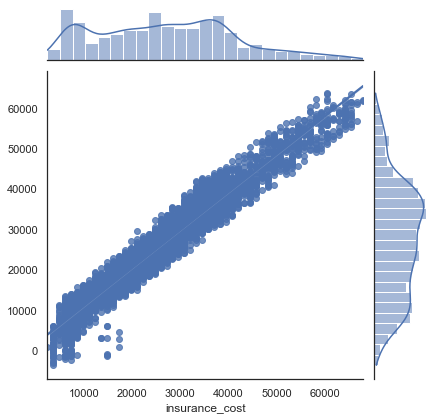

In [202]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_LR1_predvl, kind="reg", color="b")

#### Lasso model

In [203]:
Lasso1 = Lasso(alpha=1)
Lasso1.fit(X_train, y_train)

#predicting result over test data
y_Lasso1_predtr= Lasso1.predict(X_train)
y_Lasso1_predvl= Lasso1.predict(X_val)

Lasso1.coef_

array([-3.86467511e-02,  2.68667939e+00,  3.59332339e-01,  1.01889974e+00,
        1.48258497e+03,  1.64039073e+02,  3.47146675e-01,  1.87330972e+02,
        7.60815668e+01,  5.36409858e+00, -1.11106217e+02,  0.00000000e+00,
       -6.74264689e+00,  3.74132877e+01,  3.73854483e+02,  5.90235524e+01,
       -4.97543659e+00, -4.76970949e+01, -3.66593696e+01, -1.24717630e+02,
        0.00000000e+00,  0.00000000e+00,  1.67505365e+02,  4.02727493e+02,
        1.29625073e+02,  1.42349401e+02,  1.20280498e+01,  1.68361489e+01,
        1.08362596e+02,  8.54797751e+01,  7.68126732e+01,  1.49122337e+02,
        1.17497349e+00,  1.78801366e+02,  1.24338416e+03,  7.14034923e+01,
        2.55862965e+01, -2.22484921e+01,  2.46823272e+00, -8.32605467e+00,
        8.03819873e+00, -6.34607396e+02, -8.77229095e+02, -8.07551111e+02,
       -8.69769031e+02, -8.29975569e+02, -8.25431629e+02,  3.01380565e+02,
        1.37901842e+02,  5.59808436e+01, -8.34681694e+00, -3.84239233e+01,
        0.00000000e+00, -

In [204]:
#Model score and Deduction for each Model in a DataFrame
Lasso1_trscore=r2_score(y_train,y_Lasso1_predtr)
Lasso1_trRMSE=np.sqrt(mean_squared_error(y_train, y_Lasso1_predtr))
Lasso1_trMSE=mean_squared_error(y_train, y_Lasso1_predtr)
Lasso1_trMAE=mean_absolute_error(y_train, y_Lasso1_predtr)

Lasso1_vlscore=r2_score(y_val,y_Lasso1_predvl)
Lasso1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_Lasso1_predvl))
Lasso1_vlMSE=mean_squared_error(y_val, y_Lasso1_predvl)
Lasso1_vlMAE=mean_absolute_error(y_val, y_Lasso1_predvl)

Lasso1_df=pd.DataFrame({'Method':['Linear-Reg Lasso1'],'Val Score':Lasso1_vlscore,'RMSE_vl': Lasso1_vlRMSE, 'MSE_vl': Lasso1_vlMSE, 'MAE_vl': Lasso1_vlMAE,'train Score':Lasso1_trscore,'RMSE_tr': Lasso1_trRMSE, 'MSE_tr': Lasso1_trMSE, 'MAE_tr': Lasso1_trMAE})
Compa_df = pd.concat([Compa_df, Lasso1_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.945313,3349.954413,1.122219e+07,2725.560009,0.944907,3362.177047,1.130423e+07,2712.046277
0,Linear-Reg Lasso1,0.945389,3347.642405,1.120671e+07,2723.505553,0.944867,3363.384570,1.131236e+07,2713.321854


The lasso linear regression model performed with scores 0.944 & .945 in training data set and validation data set respectively.

The coefficeints of some variable in lasso model is almost '0', signifying that the variable with '0' coefficient can be dropped.

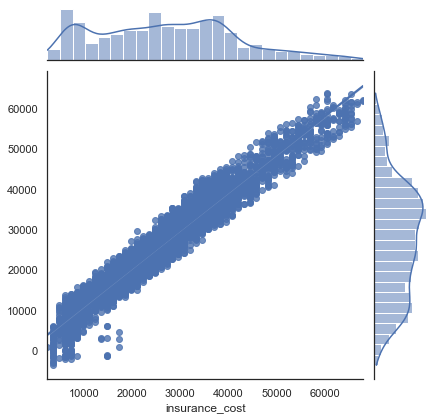

In [205]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_Lasso1_predvl, kind="reg", color="b")

#### Ridge model

In [206]:
Ridge1 = Ridge(alpha=0.5)
Ridge1.fit(X_train, y_train)

#predicting result over test data
y_Ridge1_predtr= Ridge1.predict(X_train)
y_Ridge1_predvl= Ridge1.predict(X_val)

Ridge1.coef_

array([-4.10302674e-02,  2.68638451e+00,  3.76515606e-01,  1.24834500e+00,
        1.48205355e+03,  1.63833017e+02,  3.40533652e-01,  2.06002849e+02,
        9.03119870e+01,  1.43310974e+01, -1.11078947e+02,  9.49503405e+00,
       -7.37468605e+00,  4.64096202e+01,  3.94843843e+02,  7.00943203e+01,
       -7.72041616e+00, -6.87771959e+01, -5.23105887e+01, -1.45660040e+02,
        2.22760203e+02,  2.08693206e+02,  3.91587821e+02,  6.25043592e+02,
        3.46356113e+02,  3.62187046e+02,  2.30591549e+02,  2.41583910e+02,
        3.27463565e+02,  3.05615844e+02,  3.01900529e+02,  3.66332656e+02,
        2.20844005e+02,  3.95347320e+02,  1.26345191e+03,  9.54741207e+01,
        4.81719090e+01, -2.53101099e+01,  7.50123121e+00, -6.92287545e+01,
       -3.58847320e+01, -7.31379371e+02, -9.73205822e+02, -9.04672703e+02,
       -9.70028657e+02, -9.25730725e+02, -9.22856759e+02,  1.40839357e+03,
        1.18964863e+03,  1.10875447e+03,  1.03605232e+03,  9.85148386e+02,
        1.06134411e+03,  

In [207]:
#Model score and Deduction for each Model in a DataFrame
Ridge1_trscore=r2_score(y_train,y_Ridge1_predtr)
Ridge1_trRMSE=np.sqrt(mean_squared_error(y_train, y_Ridge1_predtr))
Ridge1_trMSE=mean_squared_error(y_train, y_Ridge1_predtr)
Ridge1_trMAE=mean_absolute_error(y_train, y_Ridge1_predtr)

Ridge1_vlscore=r2_score(y_val,y_Ridge1_predvl)
Ridge1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_Ridge1_predvl))
Ridge1_vlMSE=mean_squared_error(y_val, y_Ridge1_predvl)
Ridge1_vlMAE=mean_absolute_error(y_val, y_Ridge1_predvl)

Ridge1_df=pd.DataFrame({'Method':['Linear-Reg Ridge1'],'Val Score':Ridge1_vlscore,'RMSE_vl': Ridge1_vlRMSE, 'MSE_vl': Ridge1_vlMSE, 'MAE_vl': Ridge1_vlMAE,'train Score':Ridge1_trscore,'RMSE_tr': Ridge1_trRMSE, 'MSE_tr': Ridge1_trMSE, 'MAE_tr': Ridge1_trMAE})
Compa_df = pd.concat([Compa_df, Ridge1_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.945313,3349.954413,1.122219e+07,2725.560009,0.944907,3362.177047,1.130423e+07,2712.046277
0,Linear-Reg Lasso1,0.945389,3347.642405,1.120671e+07,2723.505553,0.944867,3363.384570,1.131236e+07,2713.321854
0,Linear-Reg Ridge1,0.945316,3349.868755,1.122162e+07,2725.506503,0.944902,3362.341117,1.130534e+07,2712.364358


The lasso linear regression model performed with scores 0.944 & .945 in training data set and validation data set respectively.

The coefficeints of variables in ridge model are all non-zero, indicating that non of the variables can be dropped.

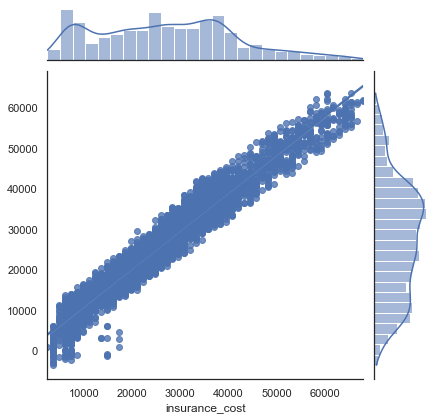

In [208]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_Ridge1_predvl, kind="reg", color="b")

Linear models have performed almost with similar results in both regularized model and non-regularized models

In [209]:
### KNN Regressor

In [210]:
from sklearn.neighbors import KNeighborsRegressor

In [211]:
knn1 = KNeighborsRegressor(n_neighbors=4,weights='distance')
knn1.fit(X_train, y_train)

#predicting result over test data
y_knn1_predtr= knn1.predict(X_train)
y_knn1_predvl= knn1.predict(X_val)

In [212]:
#Model score and Deduction for each Model in a DataFrame
knn1_trscore=r2_score(y_train,y_knn1_predtr)
knn1_trRMSE=np.sqrt(mean_squared_error(y_train, y_knn1_predtr))
knn1_trMSE=mean_squared_error(y_train, y_knn1_predtr)
knn1_trMAE=mean_absolute_error(y_train, y_knn1_predtr)

knn1_vlscore=r2_score(y_val,y_knn1_predvl)
knn1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_knn1_predvl))
knn1_vlMSE=mean_squared_error(y_val, y_knn1_predvl)
knn1_vlMAE=mean_absolute_error(y_val, y_knn1_predvl)

knn1_df=pd.DataFrame({'Method':['knn1'],'Val Score':knn1_vlscore,'RMSE_vl': knn1_vlRMSE, 'MSE_vl': knn1_vlMSE, 'MAE_vl': knn1_vlMAE,'train Score':knn1_trscore,'RMSE_tr': knn1_trRMSE, 'MSE_tr': knn1_trMSE, 'MAE_tr': knn1_trMAE})
Compa_df = pd.concat([Compa_df, knn1_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.945313,3349.954413,1.122219e+07,2725.560009,0.944907,3362.177047,1.130423e+07,2712.046277
0,Linear-Reg Lasso1,0.945389,3347.642405,1.120671e+07,2723.505553,0.944867,3363.384570,1.131236e+07,2713.321854
0,Linear-Reg Ridge1,0.945316,3349.868755,1.122162e+07,2725.506503,0.944902,3362.341117,1.130534e+07,2712.364358
0,knn1,0.588627,9187.906202,8.441762e+07,7256.932438,1.000000,0.000000,0.000000e+00,0.000000


Though KNN regressor performed well in training set, the performance score in validation set is very less. This shows that the model is overfitted in training set

### Decision Tree Regressor

In [213]:
from sklearn.tree import DecisionTreeRegressor

In [214]:
DT1 = DecisionTreeRegressor()
DT1.fit(X_train, y_train)

y_DT1_predtr= DT1.predict(X_train)
y_DT1_predvl= DT1.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
DT1_trscore=r2_score(y_train,y_DT1_predtr)
DT1_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT1_predtr))
DT1_trMSE=mean_squared_error(y_train, y_DT1_predtr)
DT1_trMAE=mean_absolute_error(y_train, y_DT1_predtr)

DT1_vlscore=r2_score(y_val,y_DT1_predvl)
DT1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_DT1_predvl))
DT1_vlMSE=mean_squared_error(y_val, y_DT1_predvl)
DT1_vlMAE=mean_absolute_error(y_val, y_DT1_predvl)

DT1_df=pd.DataFrame({'Method':['DT1'],'Val Score':DT1_vlscore,'RMSE_vl': DT1_vlRMSE, 'MSE_vl': DT1_vlMSE, 'MAE_vl': DT1_vlMAE,'train Score':DT1_trscore,'RMSE_tr': DT1_trRMSE, 'MSE_tr': DT1_trMSE, 'MAE_tr': DT1_trMAE})
Compa_df = pd.concat([Compa_df, DT1_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.945313,3349.954413,1.122219e+07,2725.560009,0.944907,3362.177047,1.130423e+07,2712.046277
0,Linear-Reg Lasso1,0.945389,3347.642405,1.120671e+07,2723.505553,0.944867,3363.384570,1.131236e+07,2713.321854
0,Linear-Reg Ridge1,0.945316,3349.868755,1.122162e+07,2725.506503,0.944902,3362.341117,1.130534e+07,2712.364358
0,knn1,0.588627,9187.906202,8.441762e+07,7256.932438,1.000000,0.000000,0.000000e+00,0.000000
0,DT1,0.909310,4313.972932,1.861036e+07,3370.671000,1.000000,0.000000,0.000000e+00,0.000000


Above performance of initial Decision tree model shows overfit in training set with 1.00 score and low performance in validation set

In [215]:
DT2 = DecisionTreeRegressor(max_depth=10,min_samples_leaf=5)
DT2.fit(X_train, y_train)

y_DT2_predtr= DT2.predict(X_train)
y_DT2_predvl= DT2.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
DT2_trscore=r2_score(y_train,y_DT2_predtr)
DT2_trRMSE=np.sqrt(mean_squared_error(y_train, y_DT2_predtr))
DT2_trMSE=mean_squared_error(y_train, y_DT2_predtr)
DT2_trMAE=mean_absolute_error(y_train, y_DT2_predtr)

DT2_vlscore=r2_score(y_val,y_DT2_predvl)
DT2_vlRMSE=np.sqrt(mean_squared_error(y_val, y_DT2_predvl))
DT2_vlMSE=mean_squared_error(y_val, y_DT2_predvl)
DT2_vlMAE=mean_absolute_error(y_val, y_DT2_predvl)

DT2_df=pd.DataFrame({'Method':['DT2'],'Val Score':DT2_vlscore,'RMSE_vl': DT2_vlRMSE, 'MSE_vl': DT2_vlMSE, 'MAE_vl': DT2_vlMAE,'train Score':DT2_trscore,'RMSE_tr': DT2_trRMSE, 'MSE_tr': DT2_trMSE, 'MAE_tr': DT2_trMAE})
Compa_df = pd.concat([Compa_df, DT2_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.945313,3349.954413,1.122219e+07,2725.560009,0.944907,3362.177047,1.130423e+07,2712.046277
0,Linear-Reg Lasso1,0.945389,3347.642405,1.120671e+07,2723.505553,0.944867,3363.384570,1.131236e+07,2713.321854
0,Linear-Reg Ridge1,0.945316,3349.868755,1.122162e+07,2725.506503,0.944902,3362.341117,1.130534e+07,2712.364358
0,knn1,0.588627,9187.906202,8.441762e+07,7256.932438,1.000000,0.000000,0.000000e+00,0.000000
0,DT1,0.909310,4313.972932,1.861036e+07,3370.671000,1.000000,0.000000,0.000000e+00,0.000000
0,DT2,0.945869,3332.900612,1.110823e+07,2648.896716,0.964258,2708.079929,7.333697e+06,2134.911302


Above decision tree model with modified parameter has better performed on the training set and validation set compared to initial decision tree model.decision tree has not performed similar to linear regression models.

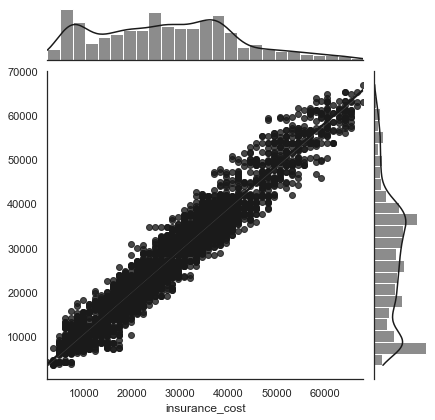

In [216]:
sns.set(style="darkgrid", color_codes=True)
            
with sns.axes_style("white"):
    sns.jointplot(x=y_val, y=y_DT2_predvl, kind="reg", color="k")

 decision tree models have  performed well in comparison with linear regression models

### Ensemble techniques

#### Boosting and Bagging

In [217]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor

In [218]:
GB1=GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state=22)
GB1.fit(X_train, y_train)

y_GB1_predtr= GB1.predict(X_train)
y_GB1_predvl= GB1.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
GB1_trscore=r2_score(y_train,y_GB1_predtr)
GB1_trRMSE=np.sqrt(mean_squared_error(y_train, y_GB1_predtr))
GB1_trMSE=mean_squared_error(y_train, y_GB1_predtr)
GB1_trMAE=mean_absolute_error(y_train, y_GB1_predtr)

GB1_vlscore=r2_score(y_val,y_GB1_predvl)
GB1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_GB1_predvl))
GB1_vlMSE=mean_squared_error(y_val, y_GB1_predvl)
GB1_vlMAE=mean_absolute_error(y_val, y_GB1_predvl)

GB1_df=pd.DataFrame({'Method':['GB1'],'Val Score':GB1_vlscore,'RMSE_vl': GB1_vlRMSE, 'MSE_vl': GB1_vlMSE, 'MAE_vl': GB1_vlMAE,'train Score':GB1_trscore,'RMSE_tr': GB1_trRMSE, 'MSE_tr': GB1_trMSE, 'MAE_tr': GB1_trMAE})
Compa_df = pd.concat([Compa_df, GB1_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.945313,3349.954413,1.122219e+07,2725.560009,0.944907,3362.177047,1.130423e+07,2712.046277
0,Linear-Reg Lasso1,0.945389,3347.642405,1.120671e+07,2723.505553,0.944867,3363.384570,1.131236e+07,2713.321854
0,Linear-Reg Ridge1,0.945316,3349.868755,1.122162e+07,2725.506503,0.944902,3362.341117,1.130534e+07,2712.364358
0,knn1,0.588627,9187.906202,8.441762e+07,7256.932438,1.000000,0.000000,0.000000e+00,0.000000
0,DT1,0.909310,4313.972932,1.861036e+07,3370.671000,1.000000,0.000000,0.000000e+00,0.000000
0,DT2,0.945869,3332.900612,1.110823e+07,2648.896716,0.964258,2708.079929,7.333697e+06,2134.911302
0,GB1,0.956304,2994.470637,8.966854e+06,2417.884199,0.958068,2933.215367,8.603752e+06,2362.993701


Gradient boosting model has provided good scores in both training and validation sets

In [219]:
BGG1=BaggingRegressor(n_estimators=50, oob_score= True,random_state=14)
BGG1.fit(X_train, y_train)

y_BGG1_predtr= BGG1.predict(X_train)
y_BGG1_predvl= BGG1.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
BGG1_trscore=r2_score(y_train,y_BGG1_predtr)
BGG1_trRMSE=np.sqrt(mean_squared_error(y_train, y_BGG1_predtr))
BGG1_trMSE=mean_squared_error(y_train, y_BGG1_predtr)
BGG1_trMAE=mean_absolute_error(y_train, y_BGG1_predtr)

BGG1_vlscore=r2_score(y_val,y_BGG1_predvl)
BGG1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_BGG1_predvl))
BGG1_vlMSE=mean_squared_error(y_val, y_BGG1_predvl)
BGG1_vlMAE=mean_absolute_error(y_val, y_BGG1_predvl)

BGG1_df=pd.DataFrame({'Method':['BGG1'],'Val Score':BGG1_vlscore,'RMSE_vl': BGG1_vlRMSE, 'MSE_vl':BGG1_vlMSE, 'MAE_vl': BGG1_vlMAE,'train Score':BGG1_trscore,'RMSE_tr': BGG1_trRMSE, 'MSE_tr': BGG1_trMSE, 'MAE_tr': BGG1_trMAE})
Compa_df = pd.concat([Compa_df, BGG1_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.945313,3349.954413,1.122219e+07,2725.560009,0.944907,3362.177047,1.130423e+07,2712.046277
0,Linear-Reg Lasso1,0.945389,3347.642405,1.120671e+07,2723.505553,0.944867,3363.384570,1.131236e+07,2713.321854
0,Linear-Reg Ridge1,0.945316,3349.868755,1.122162e+07,2725.506503,0.944902,3362.341117,1.130534e+07,2712.364358
0,knn1,0.588627,9187.906202,8.441762e+07,7256.932438,1.000000,0.000000,0.000000e+00,0.000000
0,DT1,0.909310,4313.972932,1.861036e+07,3370.671000,1.000000,0.000000,0.000000e+00,0.000000
0,DT2,0.945869,3332.900612,1.110823e+07,2648.896716,0.964258,2708.079929,7.333697e+06,2134.911302
0,GB1,0.956304,2994.470637,8.966854e+06,2417.884199,0.958068,2933.215367,8.603752e+06,2362.993701
0,BGG1,0.951987,3138.904869,9.852724e+06,2528.453660,0.992960,1201.841882,1.444424e+06,943.908195


Bagging model also performed well in training and validation sets.There seems to be overfitting in training set. We need to analyse further by hypertuning

#### Random forest

In [220]:
from sklearn.ensemble import RandomForestRegressor

In [221]:
RF1=RandomForestRegressor()
RF1.fit(X_train, y_train)

y_RF1_predtr= RF1.predict(X_train)
y_RF1_predvl= RF1.predict(X_val)

#Model score and Deduction for each Model in a DataFrame
RF1_trscore=r2_score(y_train,y_RF1_predtr)
RF1_trRMSE=np.sqrt(mean_squared_error(y_train, y_RF1_predtr))
RF1_trMSE=mean_squared_error(y_train, y_RF1_predtr)
RF1_trMAE=mean_absolute_error(y_train, y_RF1_predtr)

RF1_vlscore=r2_score(y_val,y_RF1_predvl)
RF1_vlRMSE=np.sqrt(mean_squared_error(y_val, y_RF1_predvl))
RF1_vlMSE=mean_squared_error(y_val, y_RF1_predvl)
RF1_vlMAE=mean_absolute_error(y_val, y_RF1_predvl)

RF1_df=pd.DataFrame({'Method':['RF1'],'Val Score':RF1_vlscore,'RMSE_vl': RF1_vlRMSE, 'MSE_vl':RF1_vlMSE, 'MAE_vl': RF1_vlMAE,'train Score':RF1_trscore,'RMSE_tr': RF1_trRMSE, 'MSE_tr': RF1_trMSE, 'MAE_tr': RF1_trMAE})
Compa_df = pd.concat([Compa_df, RF1_df])

Compa_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg Model1,0.945313,3349.954413,1.122219e+07,2725.560009,0.944907,3362.177047,1.130423e+07,2712.046277
0,Linear-Reg Lasso1,0.945389,3347.642405,1.120671e+07,2723.505553,0.944867,3363.384570,1.131236e+07,2713.321854
0,Linear-Reg Ridge1,0.945316,3349.868755,1.122162e+07,2725.506503,0.944902,3362.341117,1.130534e+07,2712.364358
0,knn1,0.588627,9187.906202,8.441762e+07,7256.932438,1.000000,0.000000,0.000000e+00,0.000000
0,DT1,0.909310,4313.972932,1.861036e+07,3370.671000,1.000000,0.000000,0.000000e+00,0.000000
0,DT2,0.945869,3332.900612,1.110823e+07,2648.896716,0.964258,2708.079929,7.333697e+06,2134.911302
0,GB1,0.956304,2994.470637,8.966854e+06,2417.884199,0.958068,2933.215367,8.603752e+06,2362.993701
0,BGG1,0.951987,3138.904869,9.852724e+06,2528.453660,0.992960,1201.841882,1.444424e+06,943.908195
0,RF1,0.952964,3106.802120,9.652219e+06,2503.924825,0.993338,1169.203897,1.367038e+06,927.070265


Random forest model has performed well in training and validation set. There is scope of further analysis on this model

Enseble models: in summary ensemble models have performed well on training and validation sets. These models will be selected for further analysis with hypertuning and feature selection

First 5 feature importance:	 Imp    97.096
dtype: float64
First 30 feature importance:	 Imp    99.11
dtype: float64


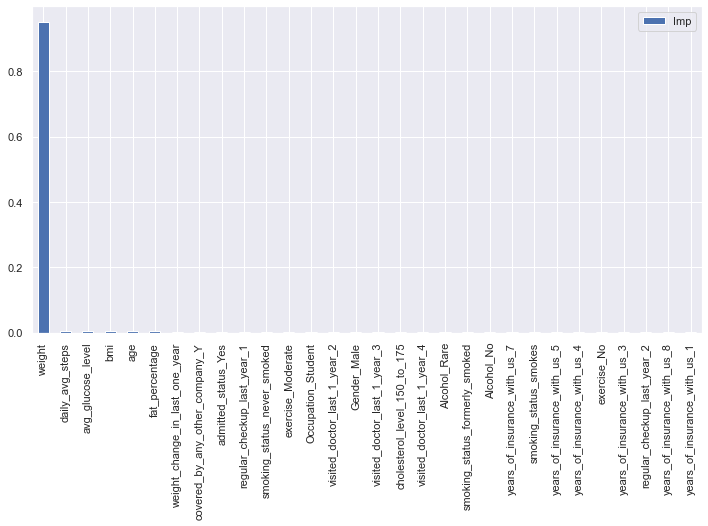

In [222]:
#feature importance
rf_imp_feature_1=pd.DataFrame(RF1.feature_importances_, columns = ["Imp"], index = X_val.columns)
rf_imp_feature_1.sort_values(by="Imp",ascending=False)
rf_imp_feature_1['Imp'] = rf_imp_feature_1['Imp'].map('{0:.5f}'.format)
rf_imp_feature_1=rf_imp_feature_1.sort_values(by="Imp",ascending=False)
rf_imp_feature_1.Imp=rf_imp_feature_1.Imp.astype("float")

rf_imp_feature_1[:30].plot.bar(figsize=(plotSizeX, plotSizeY))

#First 20 features have an importance of 90.5% and first 30 have importance of 95.15
print("First 5 feature importance:\t",(rf_imp_feature_1[:5].sum())*100)
print("First 30 feature importance:\t",(rf_imp_feature_1[:30].sum())*100)

Above are top 5 important features that account for 97.11% of variation in model. 